In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sb
import scipy
from scipy import stats

In [6]:
# Some Initializations

Lenght = 1200   # Number of catched points (Why this value?)
NumbMoves = 12000 # Number of moves
NumbAcc = 0  # Number of acceptances
A = 4   # Numbers of nucleons
h = 0.00001  # Differential Increment  (Why this value?)
t = 10  # Thermalizer (Why this value?)
T=100 #-------Done by nico
step = 0.6  # Algorithm step (Why this value?)
hbar = 6.582119*10**(-22)   #è h tagliato misurato in MeV s
Constant = (197.3269804)**2/2/939.56542052 # Constant in frontof the kinetic term, the first term is in Mev*fm
# 939.5654.. è numericamente la massa del neutrone e quindi penso che la usi in genrale
#per indicare la massa del nucleone.
#A questo punto penso che il diviso due sia l'(1/2) del termine cinetico
#Per questo il 2 e la massa del nucleone sono a divisore
#Il numeratore è la reduced Planck constant times c in MeV fm
E_loc = 0
SquaredE = 0

#nico
B = (197.3269804)**2/(2*939.56542052)
#print(C)
print(B)

20.721248538623254


In [7]:
# Optimal values

gamma = 0.08597
a =  -0.7191
beta =  2.13796 #gamma+beta of Guardiola (cool, is equivalent to the beta+gamma presented by guardiola)

In [8]:
# List for a particle's coordinates

list_X = [] # Respect to an external coordinates system (Poi dopo qui metterà solo le coordinate della prima particella)
list_Y = []
list_Z = []   #-------Done by nico
list_X_cm = [] # Respect to cm
list_Y_cm = []
list_Z_cm = []
list_X_t = [] # Respect to an external coordinates system but thermalized (What does it mean external?)
list_Y_t = []
list_X_cm_t = []  # Fisrt particle's coordinates with respect to CM and thermalized
list_Y_cm_t = []
list_X_cm_t_2 = [] # Second particle's coordinates with respect to CM and thermalized
list_Y_cm_t_2 = []
list_X_cm_t_3 = [] # Third particle's coordinates with respect to CM and thermalized
list_Y_cm_t_3 = []
list_X_cm_t_4 = [] # Fourth particles' coordinates with respect to CM and thermalized
list_Y_cm_t_4 = []

#-------Done by nico
list_X_T = [] # Respect to an external coordinates system but thermalized (What does it mean external?)
list_Y_T = []
list_X_cm_T = []  # Fisrt particle's coordinates with respect to CM and thermalized
list_Y_cm_T = []
list_X_cm_T_2 = [] # Second particle's coordinates with respect to CM and thermalized
list_Y_cm_T_2 = []
list_X_cm_T_3 = [] # Third particle's coordinates with respect to CM and thermalized
list_Y_cm_T_3 = []
list_X_cm_T_4 = [] # Fourth particles' coordinates with respect to CM and thermalized
list_Y_cm_T_4 = []

In [9]:
# Generation of the Position Matrix

#Why this form?
R = (np.random.rand(3,A)-0.5)*10*step # Coordinates Matrix (number from -3 to 3)
print(R)

[[ 1.7514505   2.14521144  1.87945895 -0.20258016]
 [ 0.22302787  0.81531285 -1.76308149 -1.57565594]
 [-2.216094    1.42809565 -0.26598658 -1.2315669 ]]


In [10]:
#DEFINITIONS OF SOME FUNCTIONS

In [11]:
#Center of mass

def CM (R):
  x_cm = 0 
  y_cm = 0 
  z_cm = 0
  for k in range(0,A):
    x_cm = x_cm + R[0,k]
    y_cm = y_cm + R[1,k]
    z_cm = z_cm + R[2,k]
  return x_cm/A, y_cm/A, z_cm/A
#Somma le 4 componenti della riga della matrice R
#Questo lo fa per le tre righe che sarebbero x, y, z.
#Restituisce le coordinate del centro di massa dividendo le tre somme per A, il numero
#di nucleoni, che nel caso dell'elio 4 è 4.
print(CM(R))

(1.3933851844913412, -0.5750991764352549, -0.571387957535327)


In [12]:
#Definition of distance function

def d(R,i,j):
  d = (R[0,i]-R[0,j])**2 + (R[1,i]-R[1,j])**2 +(R[2,i]-R[2,j])**2
  return d
#dovrebbe essere la formula della distanza, ma in realtà restituisce la distanza al quadrato
#'i' e 'j' essendo i secondi indici della matrice R vanno da 0 a 3.
#ovvero sono gli indici dello specifico nucleone
#Pertanto questa è la formula per ricavare la distanza tra due generici nucleoni 'i' 'j'

In [13]:
#Definition of wavefunction

def WF(R, gamma, a, beta):
  wf = 1
  for i in range(0,A-1):
    for j in range(i+1,A):
      wf = wf * (math.exp(-gamma*d(R,i,j))+a*math.exp(-beta*d(R,i,j)))    
  return wf 
#The wave function is based on a two body potential so I have to consider all the possible pairing between nucleons
#Is a product of the all wavefunction, available at page 32 of the pdf
#Is the equivalent of the productorial of the all g(r_ij)
print(WF(R, gamma, a, beta))

0.004534507044155007


In [14]:
#Local energy (E' energia potenziale)

def V(R):
    V = 0
    for i in range(0,A-1):
        for j in range(i+1,A):
            #V = V + 1000*math.exp(-3*d(R,i,j))-165.35*math.exp(-1.05*d(R,i,j))-21.5*math.exp(-0.6*d(R,i,j))-83*math.exp(-0.8*d(R,i,j))-11.5*math.exp(-0.4*d(R,i,j))
            V = V + 1000*np.exp(-3*d(R,i,j))-165.35*np.exp(-1.05*d(R,i,j))-21.5*np.exp(-0.6*d(R,i,j))-83*np.exp(-0.8*d(R,i,j))-11.5*np.exp(-0.4*d(R,i,j))
    return V
#The one reported above is the two body potential given by the pdf
#That specific formula is given at page 32 of the pdf "Guardiola MonteCarlo Methods"
print(V(R))

-6.264507101928858


[[[-50.         -48.98989899 -47.97979798 -46.96969697 -45.95959596
   -44.94949495 -43.93939394 -42.92929293 -41.91919192 -40.90909091
   -39.8989899  -38.88888889 -37.87878788 -36.86868687 -35.85858586
   -34.84848485 -33.83838384 -32.82828283 -31.81818182 -30.80808081
   -29.7979798  -28.78787879 -27.77777778 -26.76767677 -25.75757576
   -24.74747475 -23.73737374 -22.72727273 -21.71717172 -20.70707071
   -19.6969697  -18.68686869 -17.67676768 -16.66666667 -15.65656566
   -14.64646465 -13.63636364 -12.62626263 -11.61616162 -10.60606061
    -9.5959596   -8.58585859  -7.57575758  -6.56565657  -5.55555556
    -4.54545455  -3.53535354  -2.52525253  -1.51515152  -0.50505051
     0.50505051   1.51515152   2.52525253   3.53535354   4.54545455
     5.55555556   6.56565657   7.57575758   8.58585859   9.5959596
    10.60606061  11.61616162  12.62626263  13.63636364  14.64646465
    15.65656566  16.66666667  17.67676768  18.68686869  19.6969697
    20.70707071  21.71717172  22.72727273  23.7373

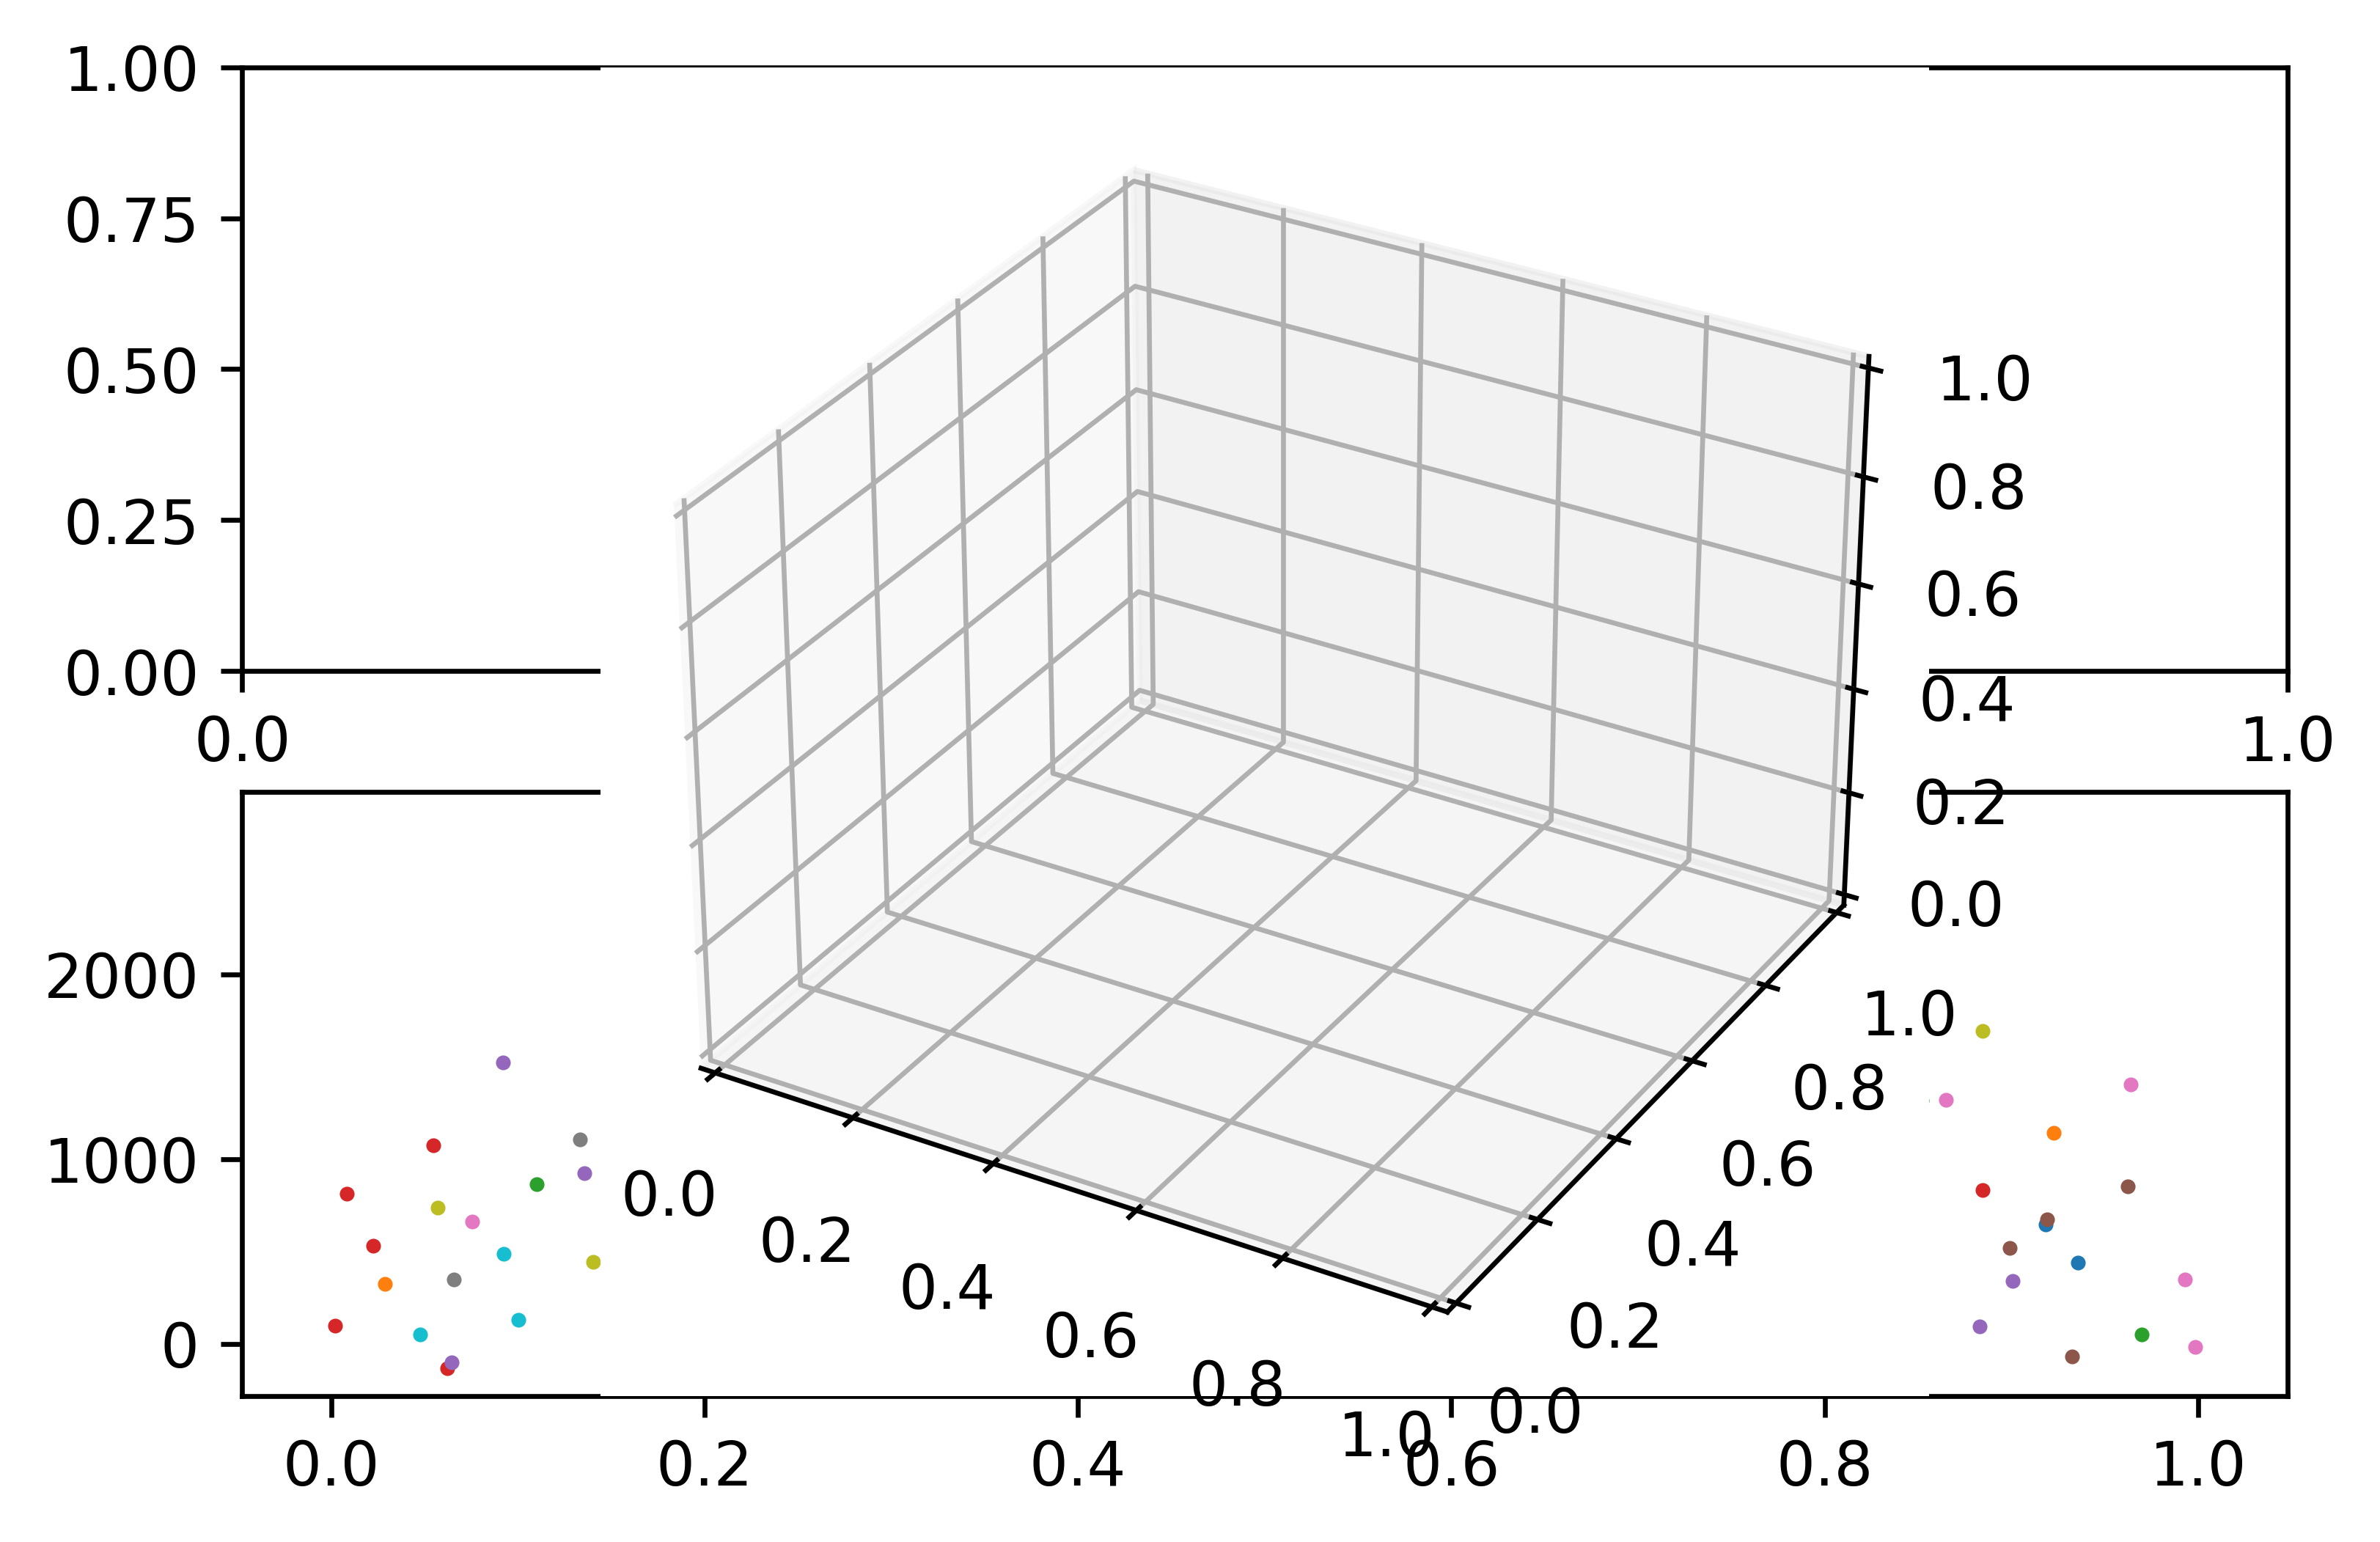

In [15]:
define=np.array([[np.linspace(-50,50,100)],[np.linspace(-50,50,100)]])
print(define)
pippo2=[]
virgo2=[]
fig, ax = plt.subplots(2,dpi=600)
ax[0] = fig.add_subplot(projection='3d')
for i in range(0,100):
    pippo=np.random.rand(3,4)
    pippo2.append(pippo)
    virgo=V(pippo)
    virgo2.append(V(pippo))
    #ax[0].plot_surface(pippo[0,0],pippo[0,1],V(pippo), color = "black",s=2)
    ax[1].scatter(pippo[0,0],V(pippo),s=2)

#ax[0].plot_surface(franco,franchino,beppe)

plt.show()

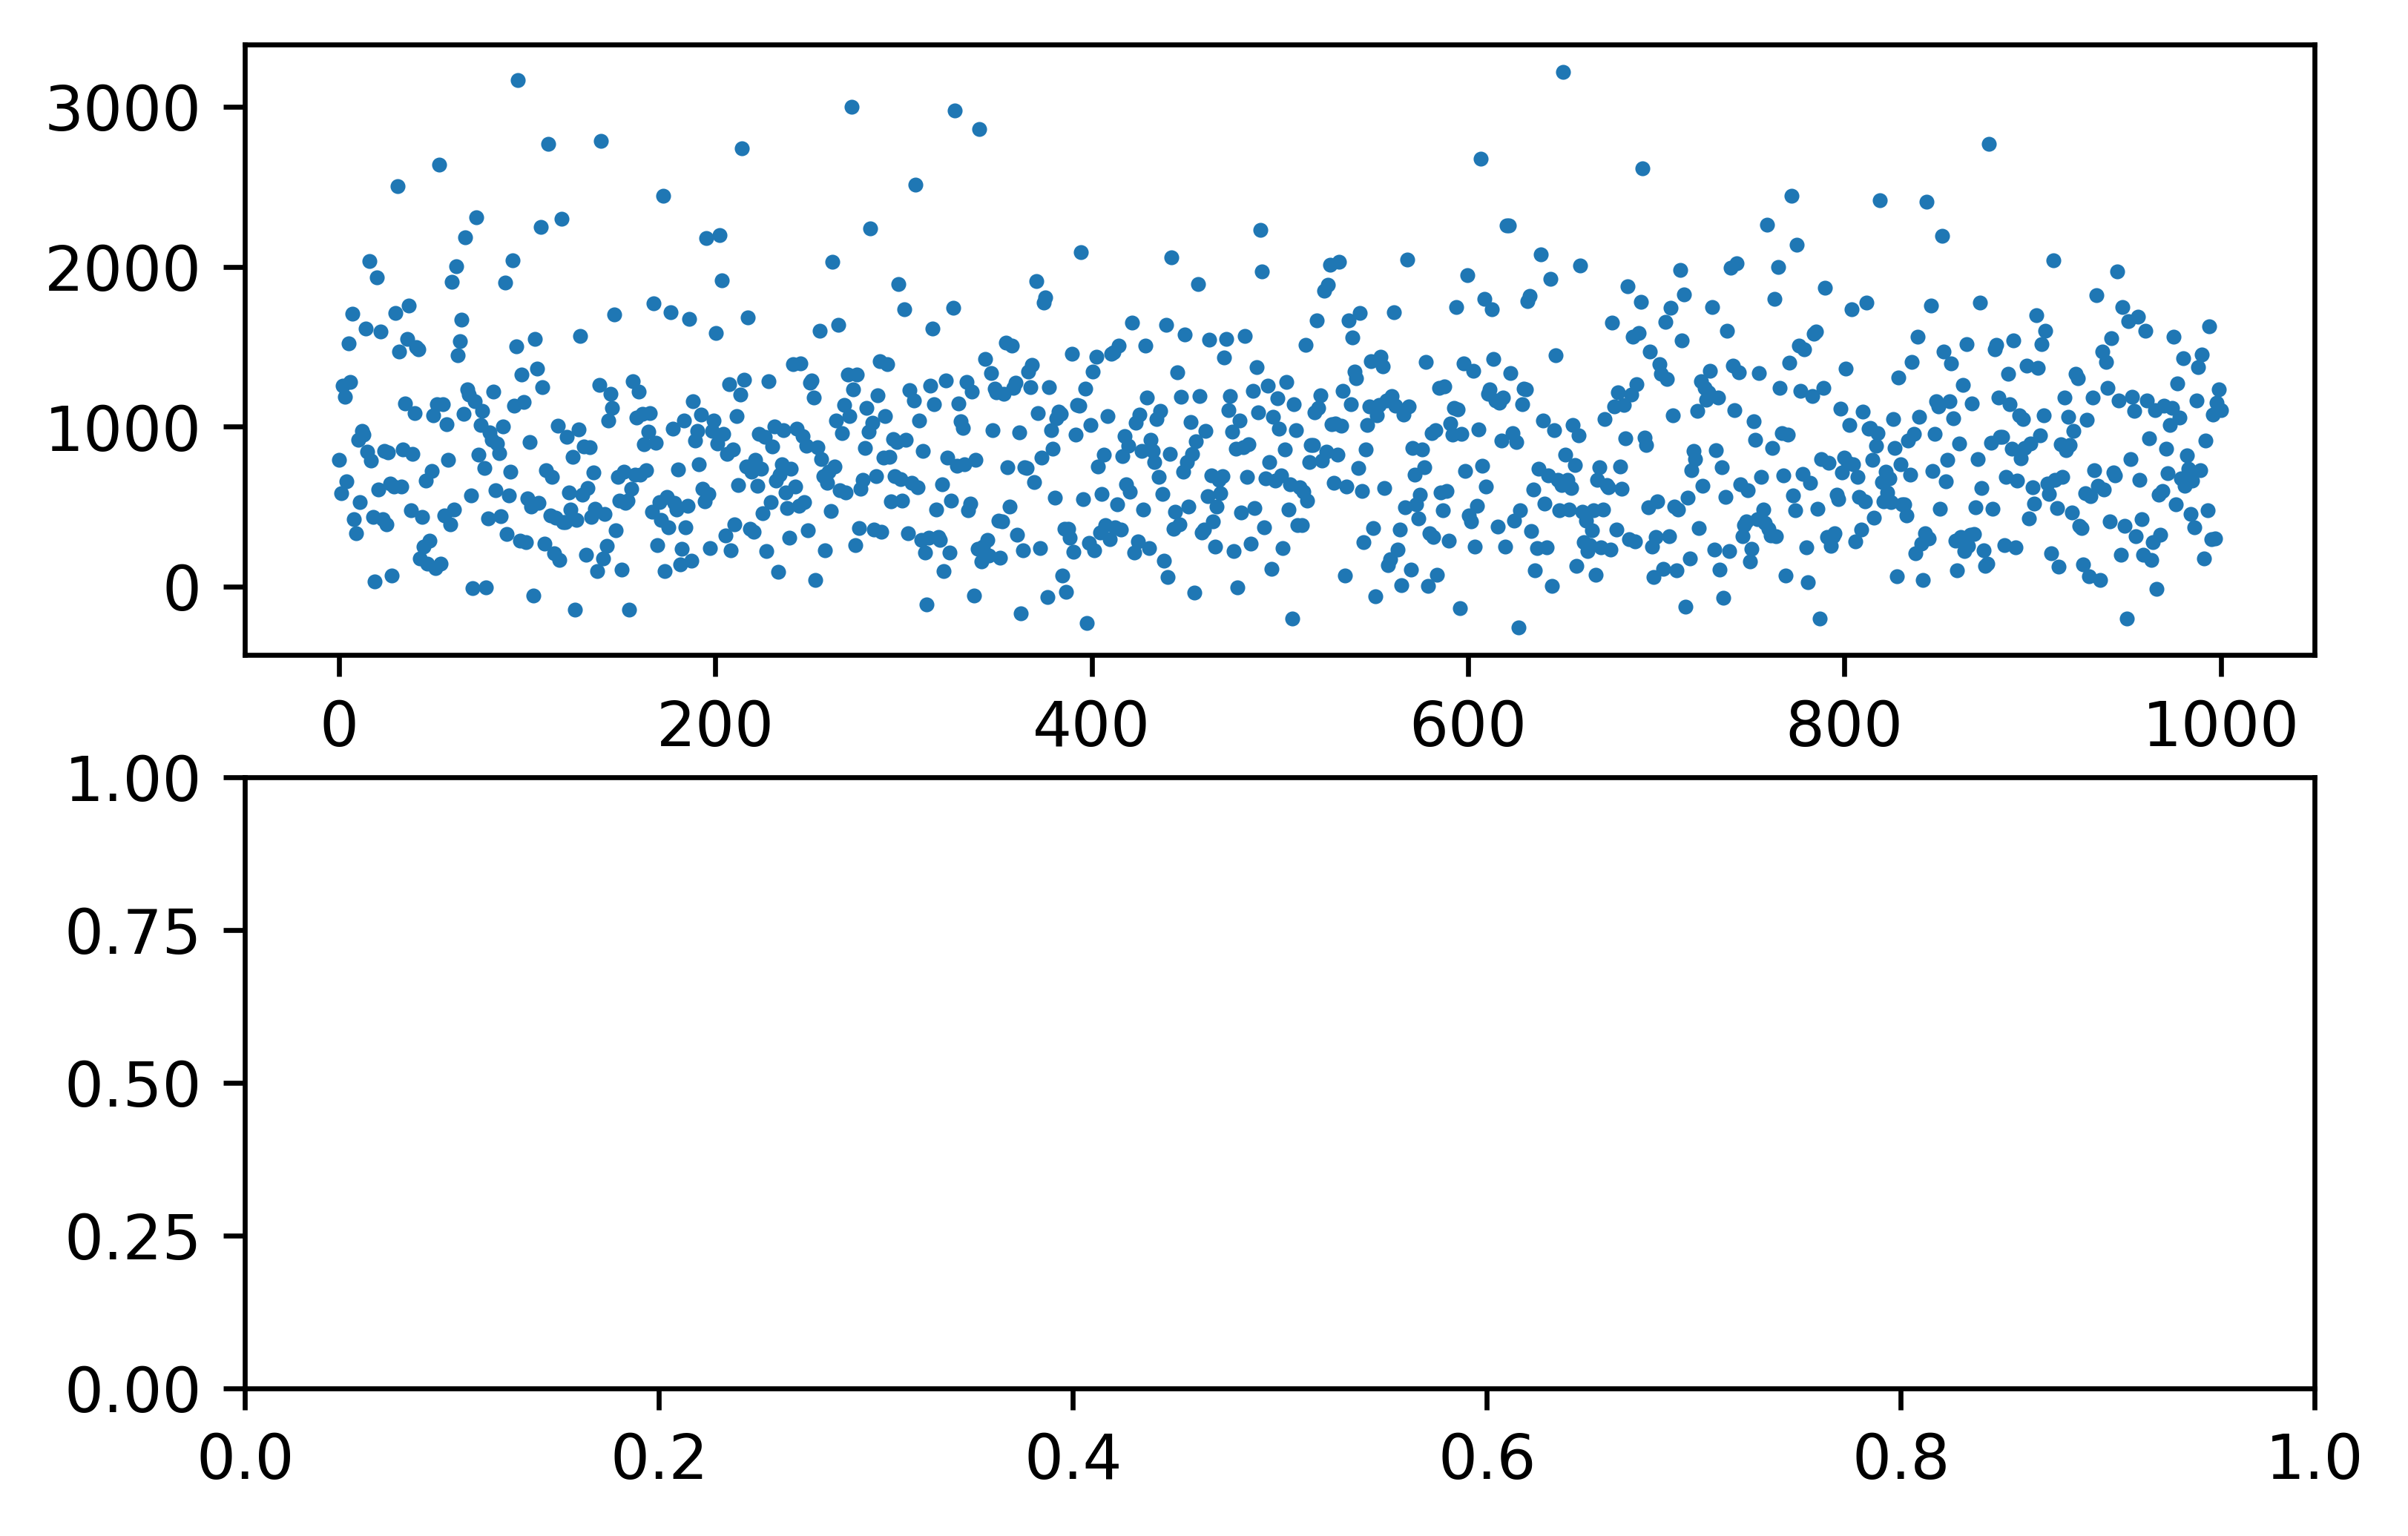

In [16]:
listi=[]
for i in range(0,1000):
    value=np.random.rand(3,4)
    V(value)
    listi.append(V(value))
calma=np.linspace(0,1000,1000)
fig, ax = plt.subplots(2,dpi=600)
ax[0].scatter(calma, listi, s=2)

[[[-50.         -48.98989899 -47.97979798 -46.96969697 -45.95959596
   -44.94949495 -43.93939394 -42.92929293 -41.91919192 -40.90909091
   -39.8989899  -38.88888889 -37.87878788 -36.86868687 -35.85858586
   -34.84848485 -33.83838384 -32.82828283 -31.81818182 -30.80808081
   -29.7979798  -28.78787879 -27.77777778 -26.76767677 -25.75757576
   -24.74747475 -23.73737374 -22.72727273 -21.71717172 -20.70707071
   -19.6969697  -18.68686869 -17.67676768 -16.66666667 -15.65656566
   -14.64646465 -13.63636364 -12.62626263 -11.61616162 -10.60606061
    -9.5959596   -8.58585859  -7.57575758  -6.56565657  -5.55555556
    -4.54545455  -3.53535354  -2.52525253  -1.51515152  -0.50505051
     0.50505051   1.51515152   2.52525253   3.53535354   4.54545455
     5.55555556   6.56565657   7.57575758   8.58585859   9.5959596
    10.60606061  11.61616162  12.62626263  13.63636364  14.64646465
    15.65656566  16.66666667  17.67676768  18.68686869  19.6969697
    20.70707071  21.71717172  22.72727273  23.7373

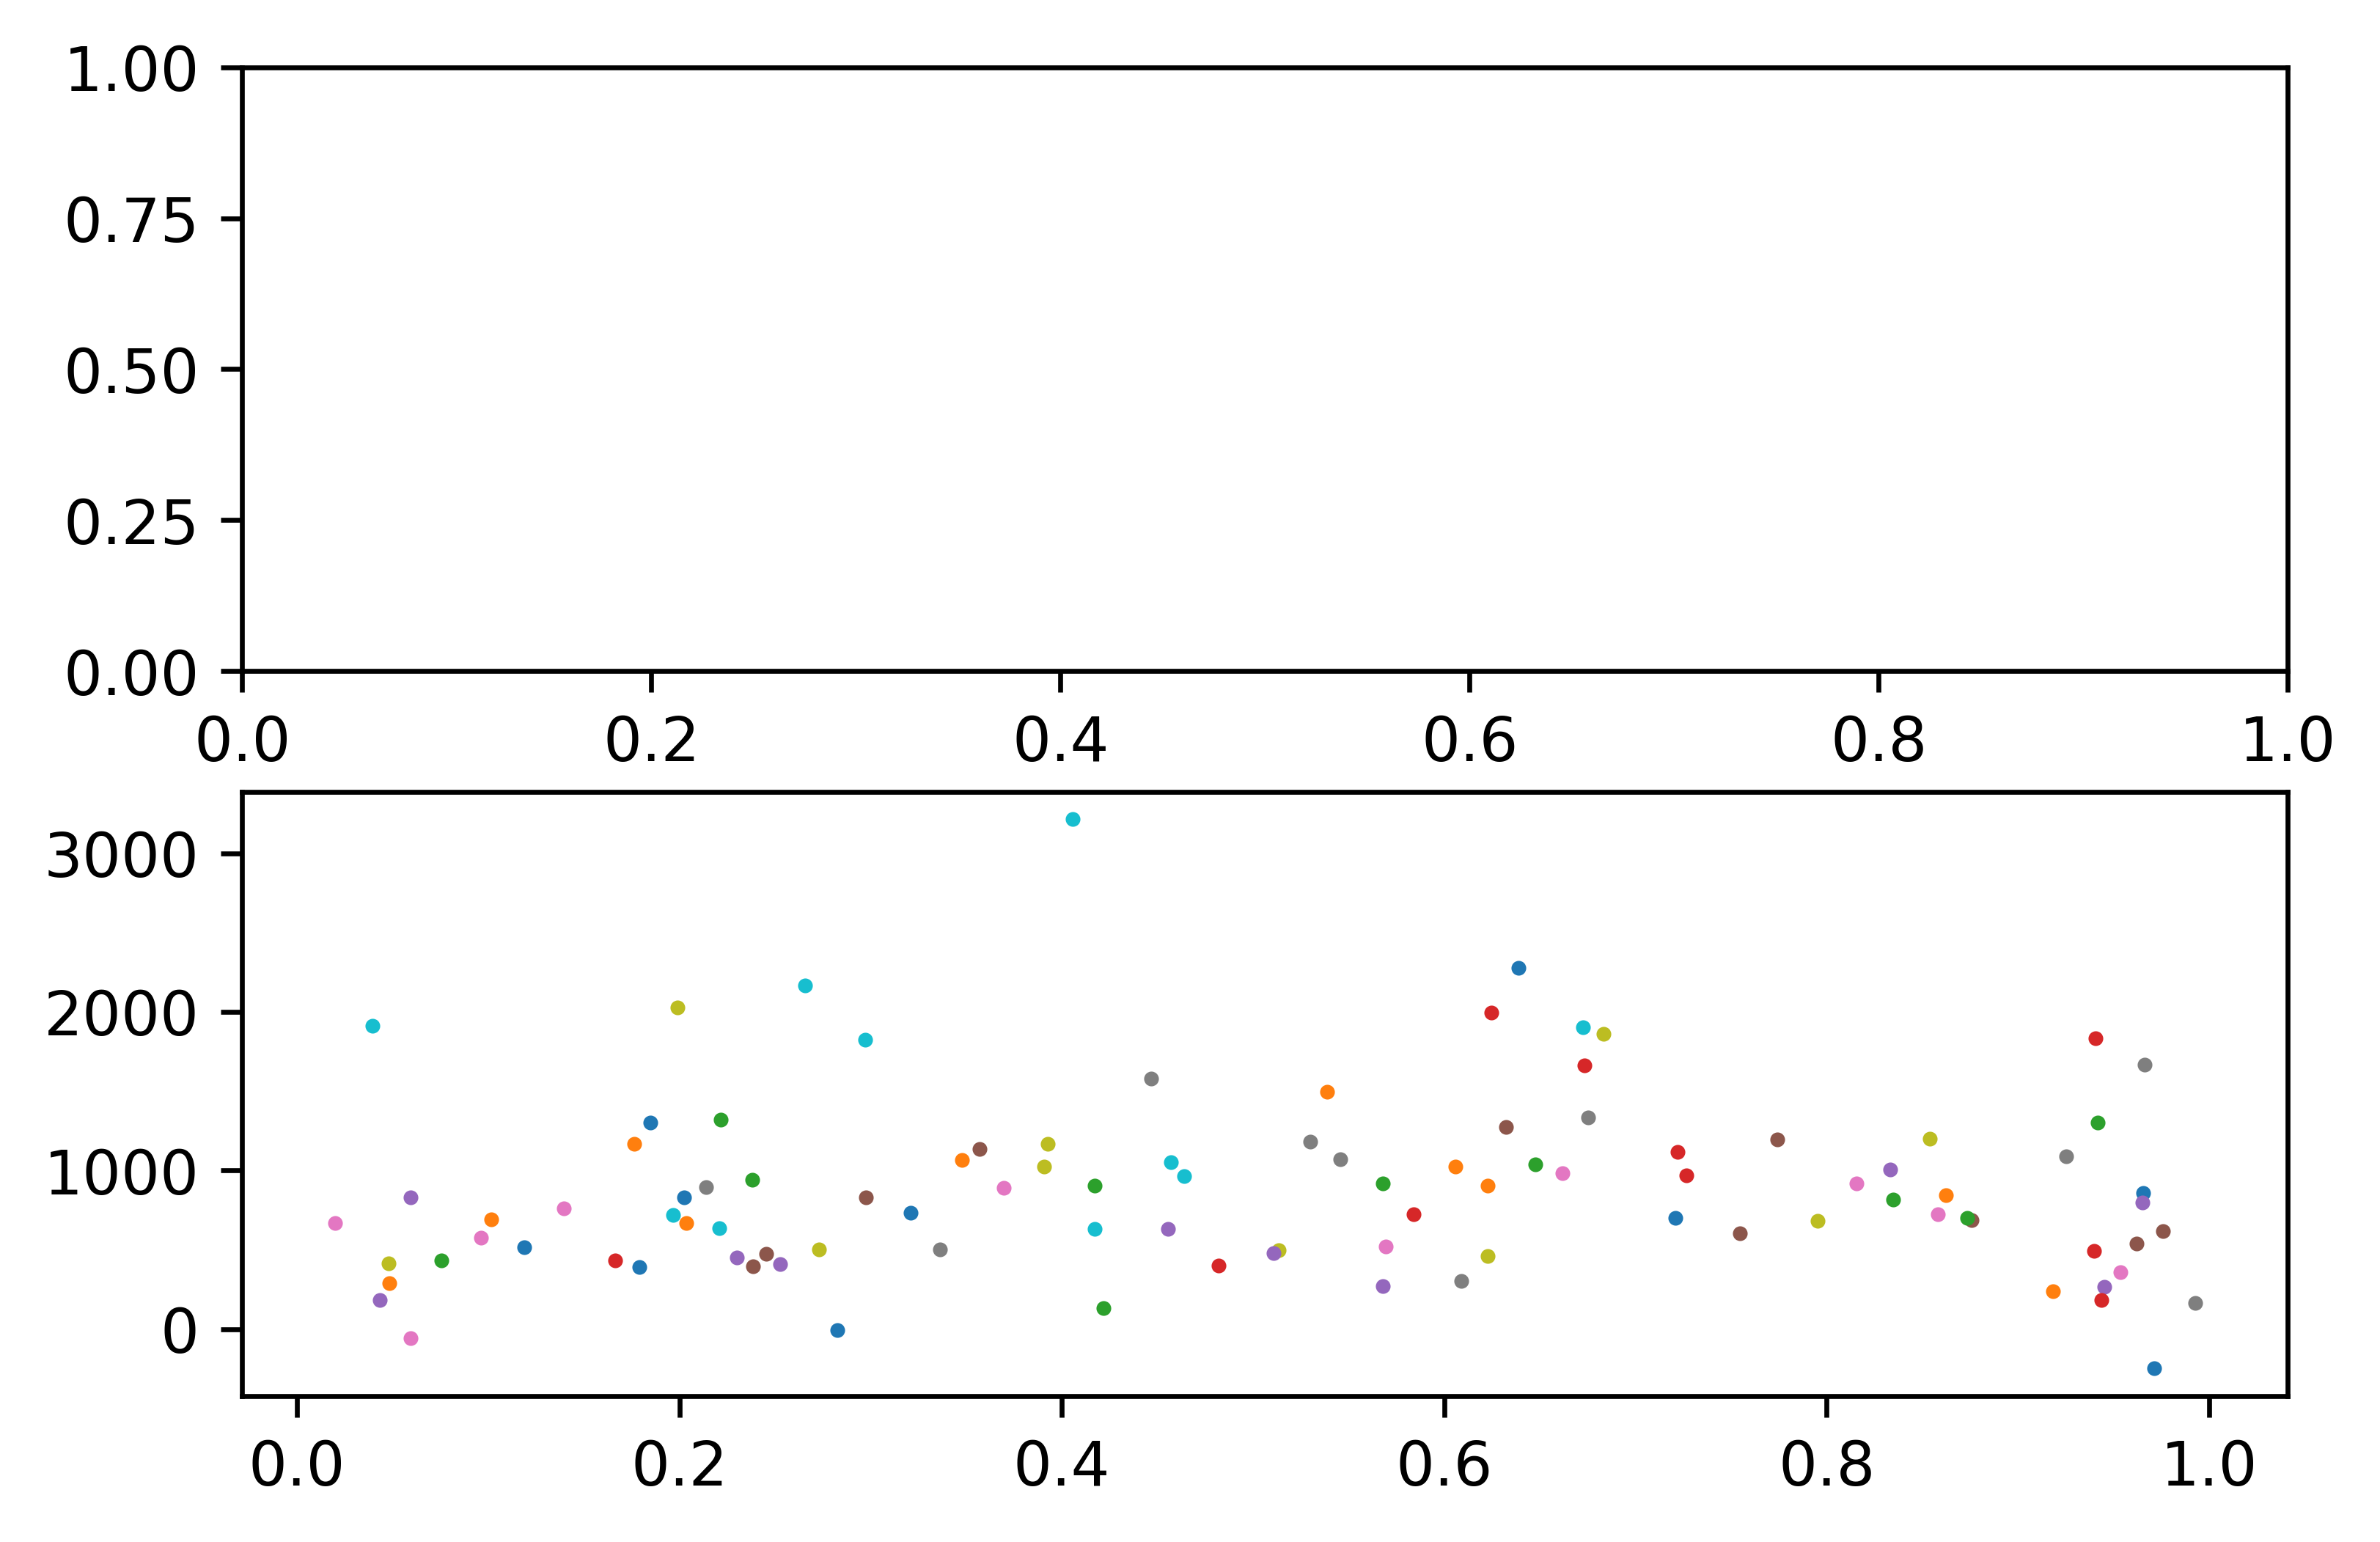

In [17]:
define=np.array([[np.linspace(-50,50,100)],[np.linspace(-50,50,100)]])
print(define)
fig, ax = plt.subplots(2,dpi=600)
#ax[0] = fig.add_subplot(projection='3d')
for i in range(0,100):
    pippo=np.random.rand(3,4)
    virgo=V(pippo)
    
    #ax[0].scatter(pippo[0,0],pippo[0,1],V(pippo), color = "black",s=2)
    ax[1].scatter(pippo[0,0],V(pippo),s=2)


plt.show()

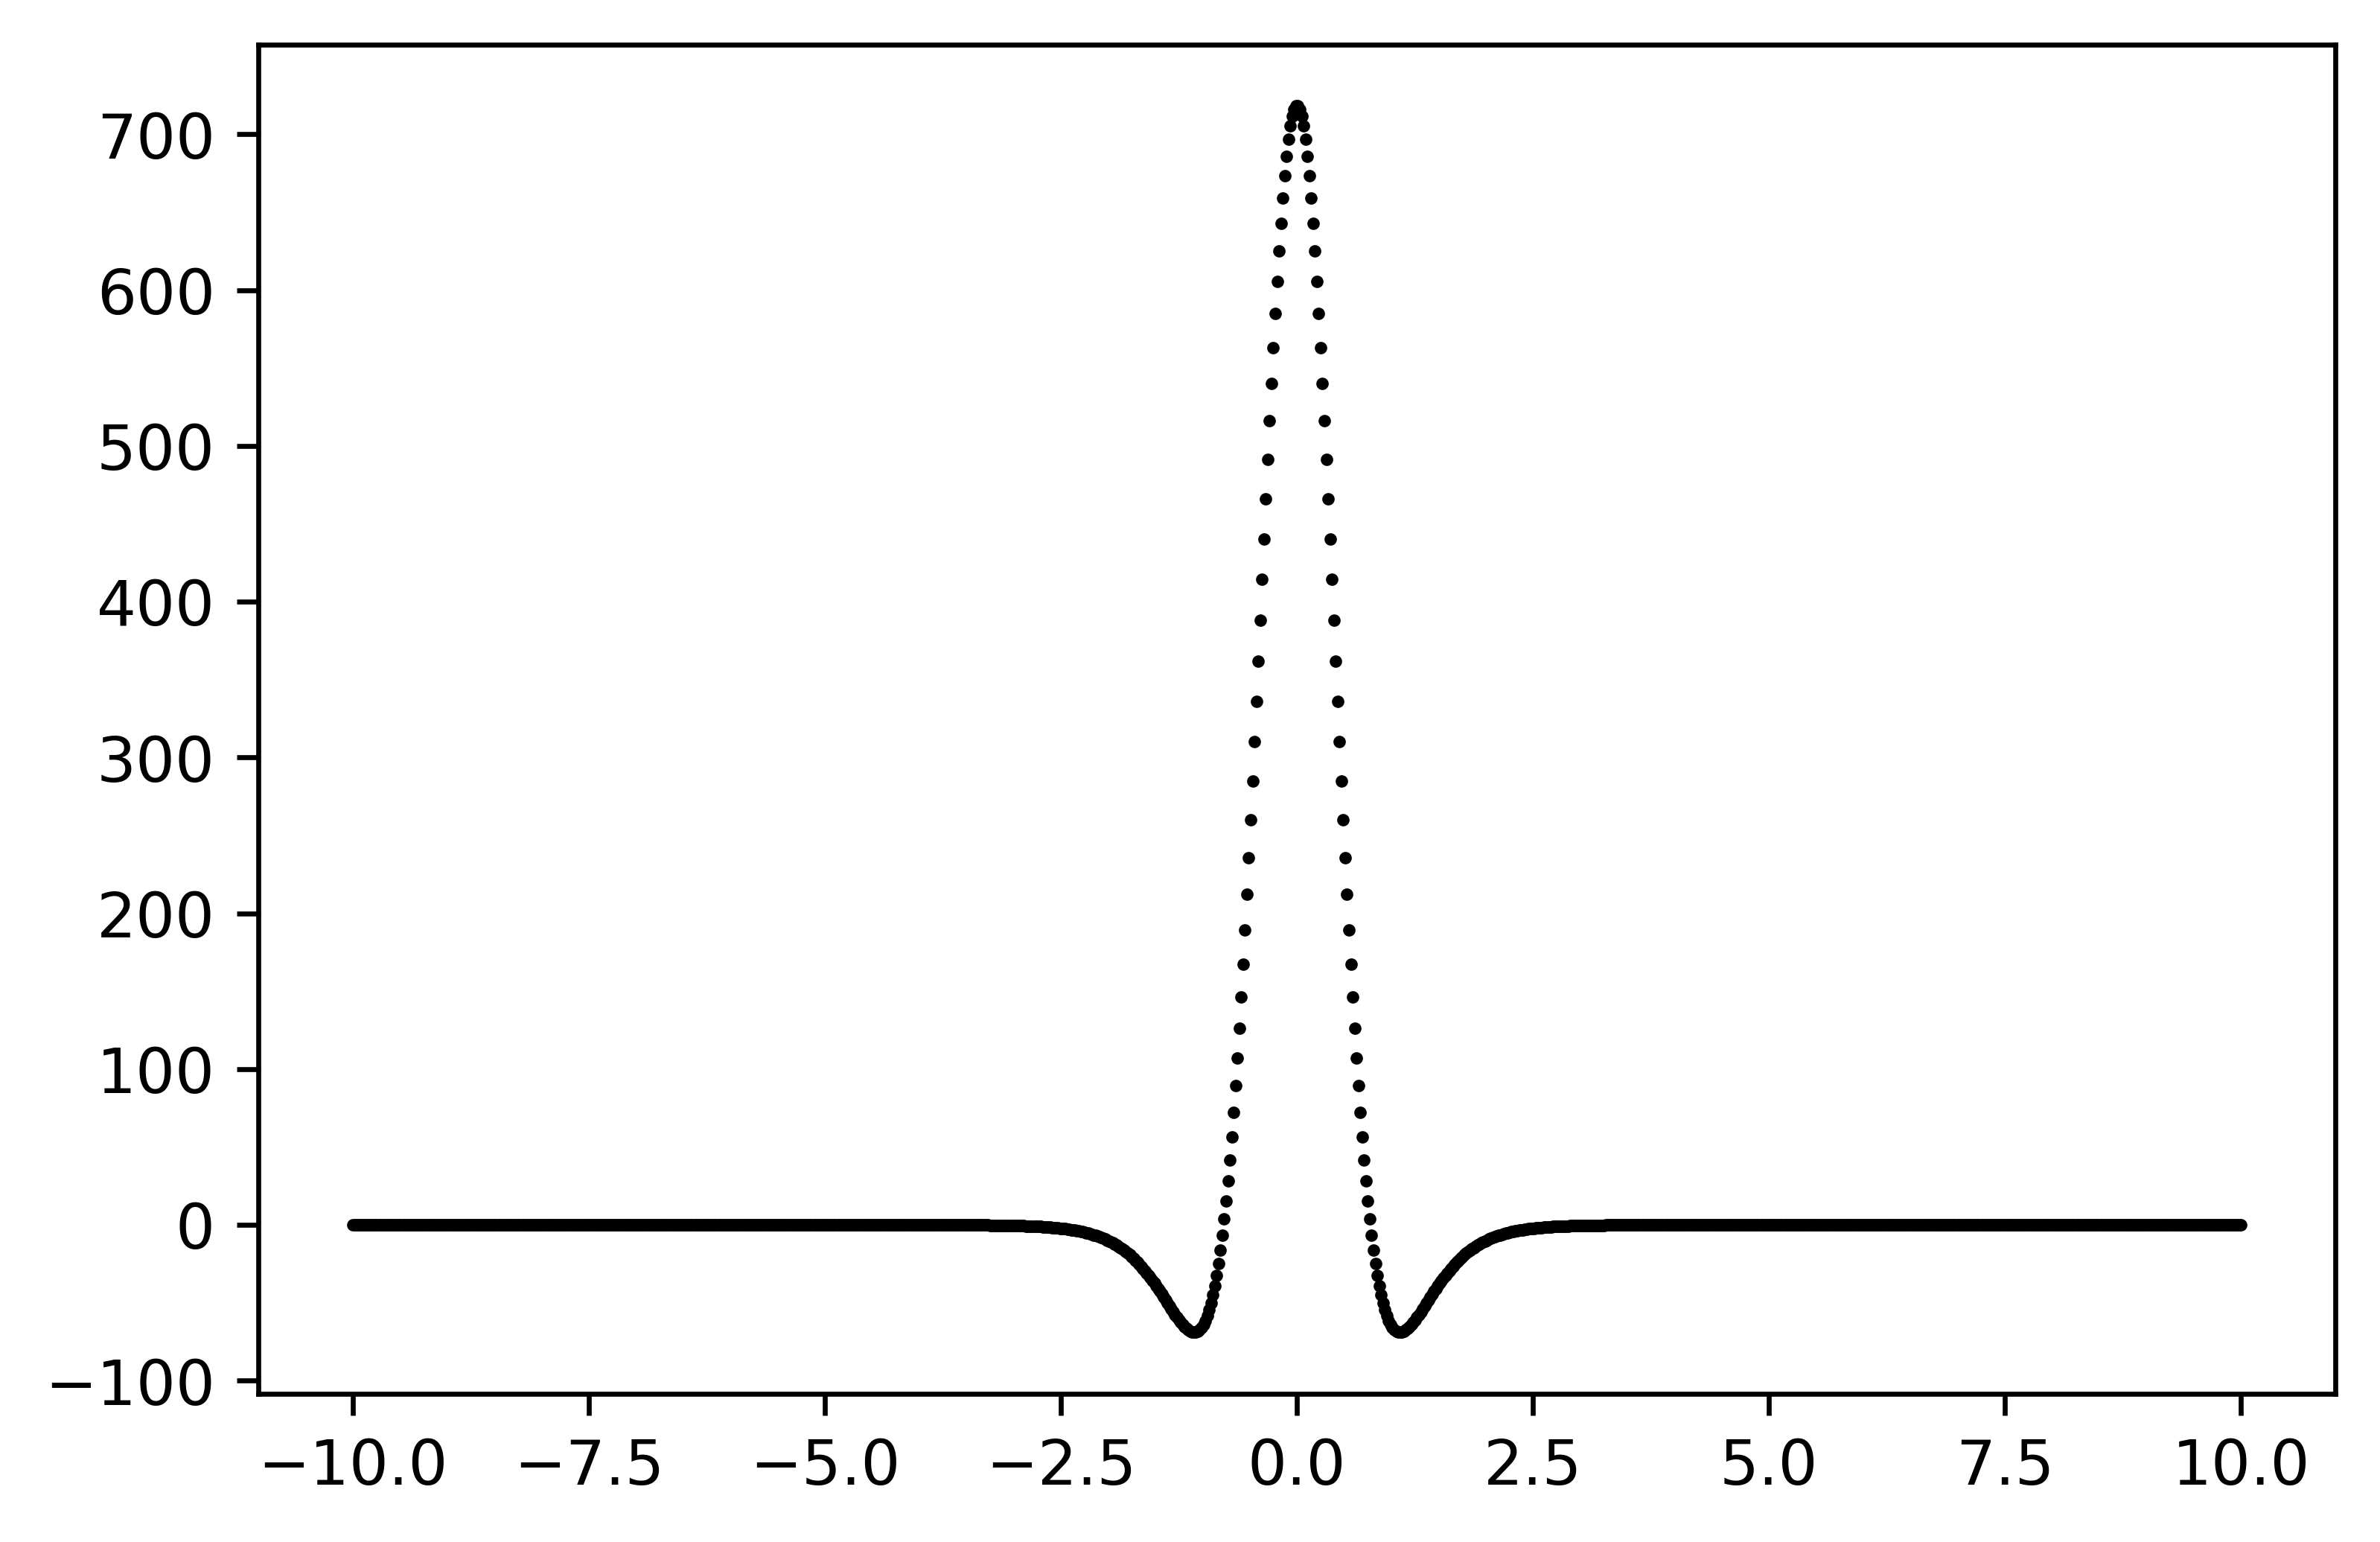

In [18]:
fig, ax = plt.subplots(dpi=600)
pi=np.linspace(-10,10,1000)
#se=np.exp(pi)
#ax=plt.plot(pi,se)
#for m in range(len(pi)):
#    u=pi[m]
Vot= 1000*np.exp(-3*(pi**2))-165.35*np.exp(-1.05*(pi**2))-21.5*np.exp(-0.6*(pi**2))-83*np.exp(-0.8*(pi**2))-11.5*np.exp(-0.4*(pi**2))
ax=plt.scatter(pi,Vot,s=1, color='black')
#print(pi)

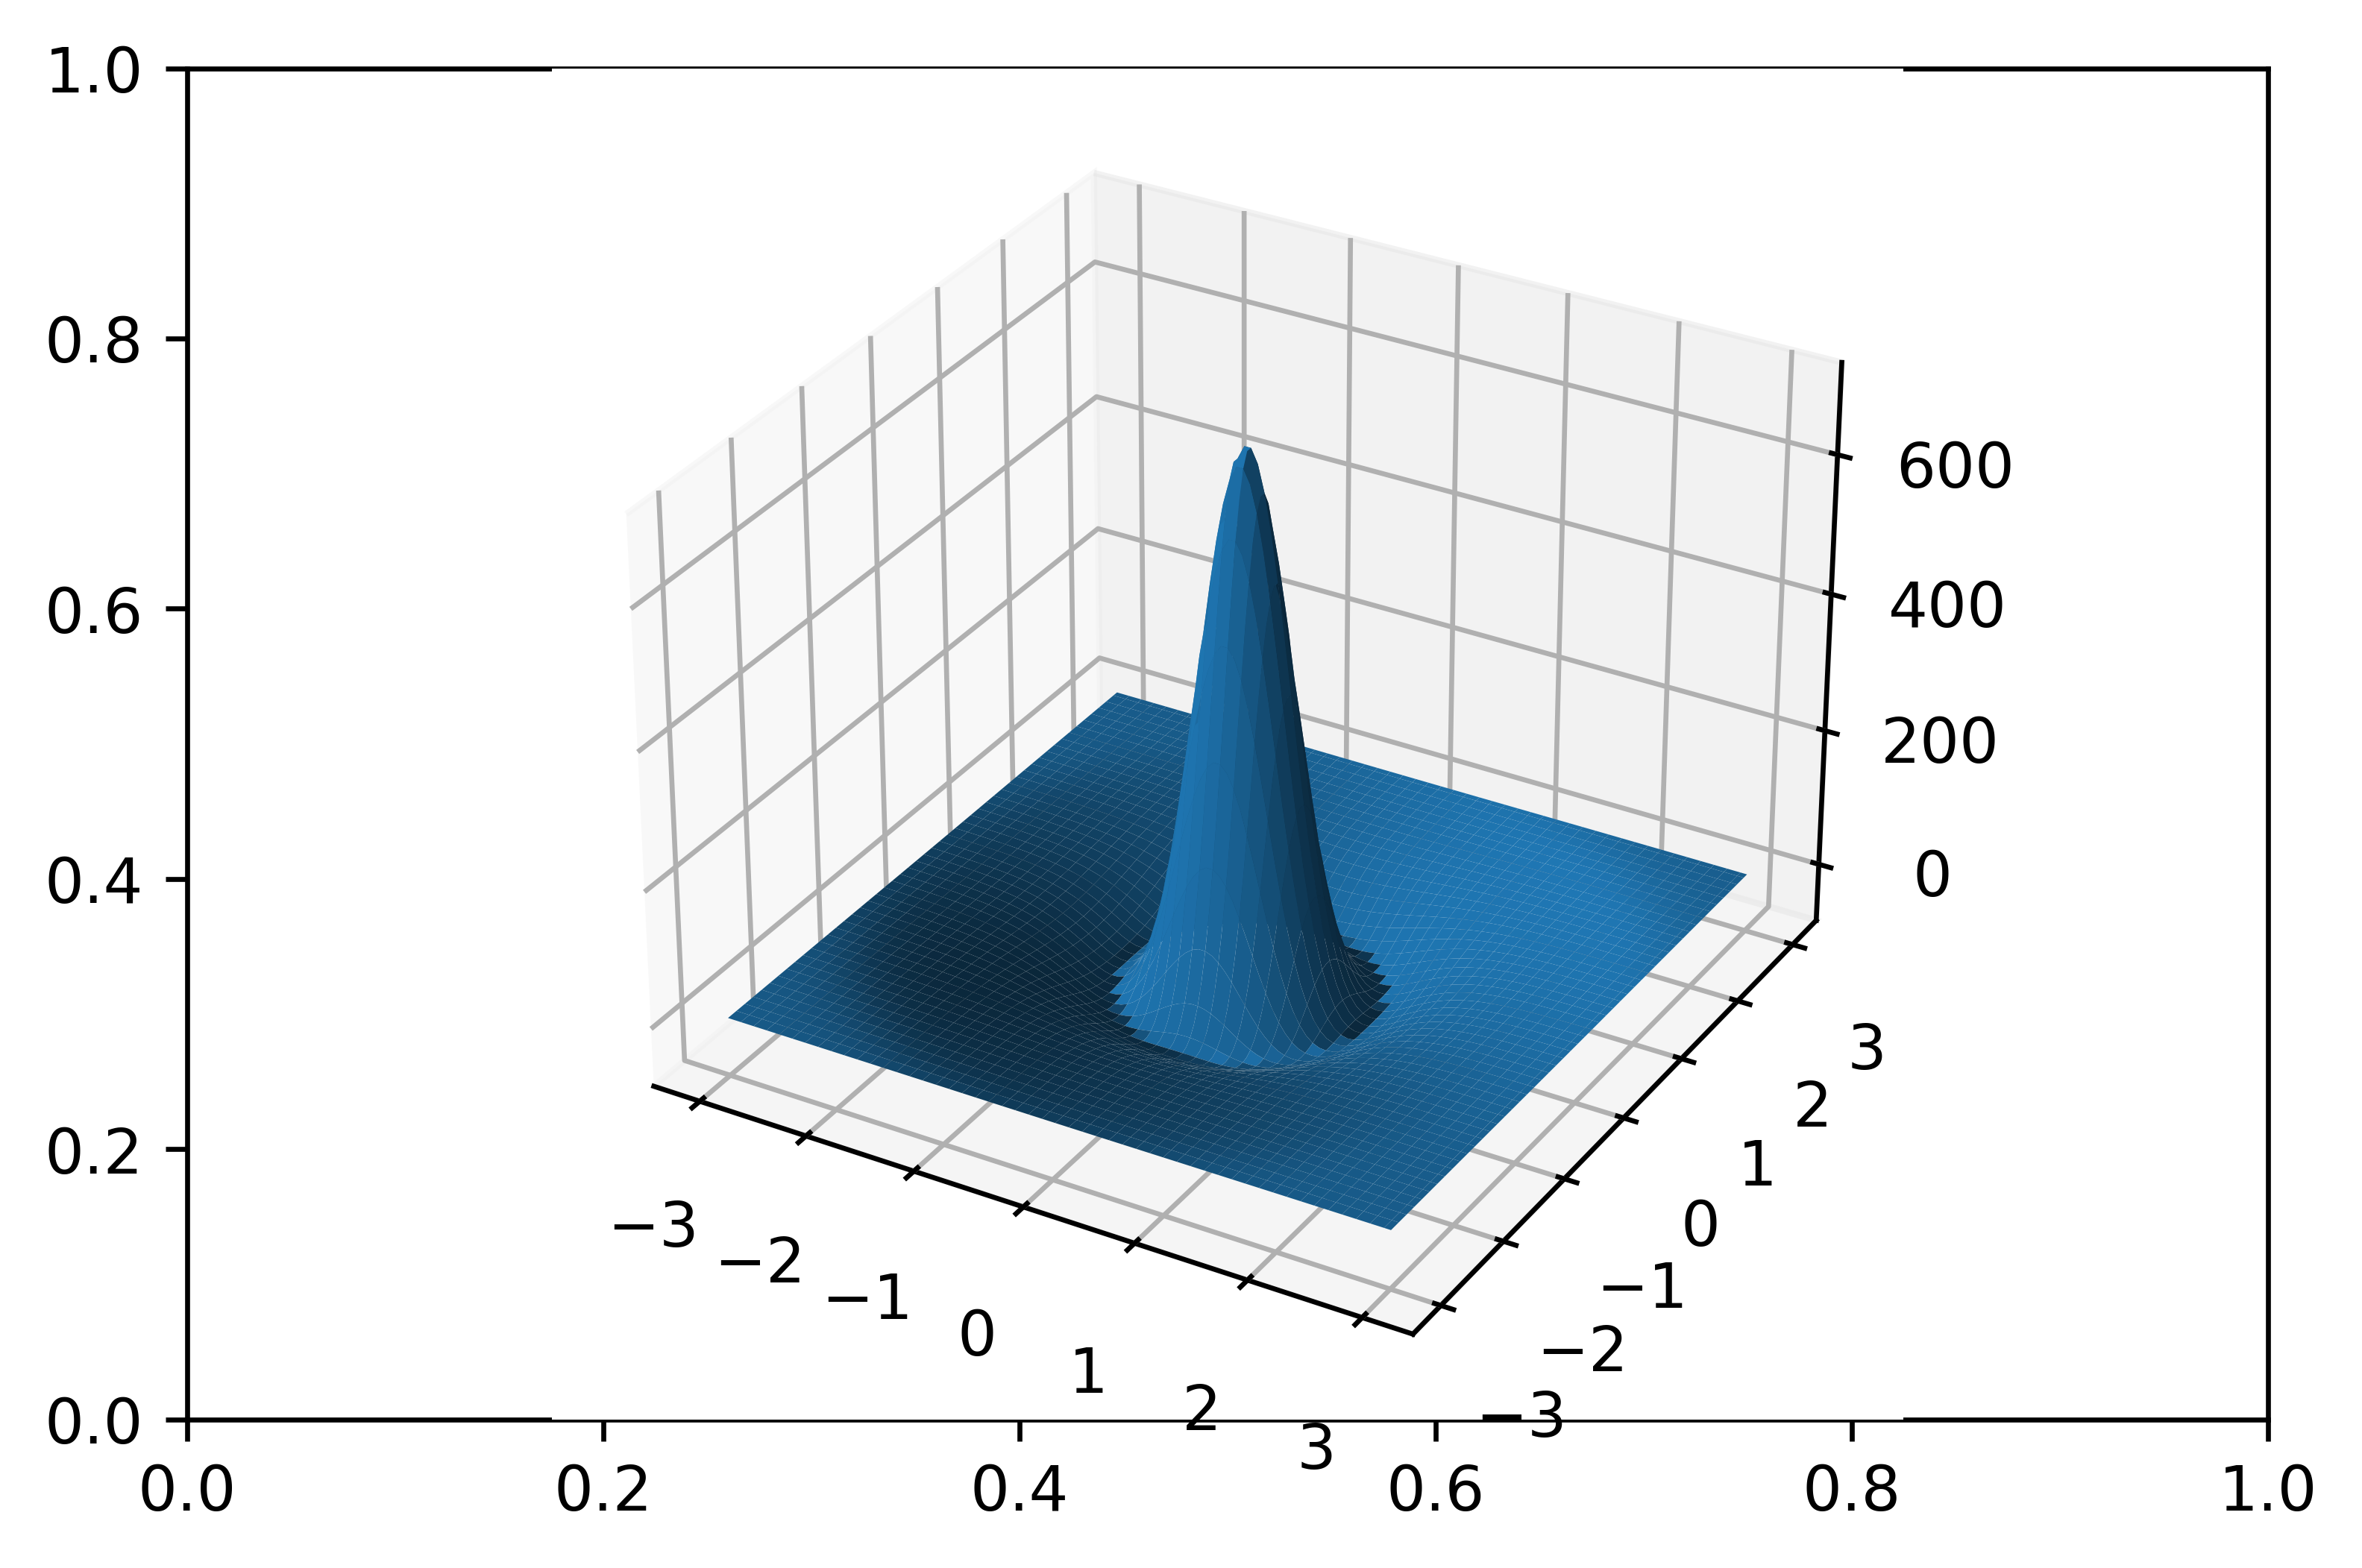

In [19]:
fig, ax = plt.subplots(dpi=600)
ax = fig.add_subplot(projection='3d')
pi=np.linspace(-3,3,100)
pi2=np.linspace(-3,3,100)
pi,pi2=np.meshgrid(pi,pi2)  #POTENTE
#se=np.exp(pi)
#ax=plt.plot(pi,se)
#for m in range(len(pi)):
#    u=pi[m]
Vot= 1000*np.exp(-3*(pi**2+pi2**2))-165.35*np.exp(-1.05*(pi**2+pi2**2))-21.5*np.exp(-0.6*(pi**2+pi2**2))-83*np.exp(-0.8*(pi**2+pi2**2))-11.5*np.exp(-0.4*(pi**2+pi2**2))
#ax.scatter(pi, pi2, Vot, s=2 , c="black")
ax.plot_surface(pi,pi2,Vot)
#print(pi)

#DOVREBBE ESSERE IL POTENZIALE RECRIPROCO TRA DUE NUCLEONI DELL'HE

In [20]:
q=np.linspace(-5,5,100)
qq=np.linspace(-5,5,100)
q,qq=np.meshgrid(q,qq)

#fig,ax=plt.subplots()
#ax = fig.add_subplot(projection='3d')
#ax.plot(q,qq,V(q))

In [21]:
#Derivative of WF with the increment of h

def Diff (R, i, j, h):
    R_P = R.copy()
    R_M = R.copy()
    R_P[i,j] = R[i,j]+h
    R_M[i,j] = R[i,j]-h
    return (WF(R_P, gamma, a, beta)+WF(R_M, gamma, a, beta)-2*WF(R, gamma, a, beta))/h**2 

#That's seem to be the derivative of an even function.
#Even function do not have the odd derivatives, only have even ones, and the first one is
#the second grade derivatives, and looks exaclty like the one plotted a part for the missing
#factor two at denominator that is only present in theory and not in the code.
#Why? And also the h squared why is there?

In [22]:
#Kinetic term

def K(R):
    K = 0 
    for j in range(0,A):
        for i in range(0,3):
            K = K + Diff(R,i,j,h)*Constant
    return K

#One dimensional armonic ossillator has the hamiltonian equal to H = -d^2/dx^2 + x^2
# H = 1/2 (p^2/m + m w^2 x^2)
#Quindi C rappresenta il fattore (1/(2*m)) il p^2 è di fatto la derivata di WF al quadrato
#Tuttavia inserisce solo Diff, come mai? E' anche vero che in realtà è tipo la derivata
#seconda perchè è una funzione pari tipo...
print(K(R))

0.11557240980443036


In [23]:
print(V(R) - (K(R)/WF(R, gamma, a, beta)))

-31.751822190214703


In [55]:
# Metropolis Algorithm
NumbAcc=0
E_loc = 0
SquaredE = 0
list_Squared=[]
list_Mean=[]
#anche le altre liste devono essere richiamate ed azzerate ogni volta prima di eseguire
#questa cella

for k in range(0,NumbMoves):

# Generation of a new configuration

    R_new = R.copy() + step*(np.random.rand(3,A)-0.5)  #Perchè qui non moltiplico per 10?
    #np.random.rand(3,A) restituisce un array 3 x A di numeri casuali tra 0 e 1 escluso
    #poi sottrae -0,5 per far si che la media totale dell'exp.value sia 0
    #np.random.rand() senza passargli nulla riproduce un solo numero casuale tra 0 e1

# Acceptance or not?
#Perchè quella condizione nell'if? la prima è superflua visto che 1 è sempre maggiore di 
#un qualsiasi numero random tra 0 e 1. No?
#vatti a vedere la termalizzazione a pagina 293 del guardiola
#praticamente invece di prendere tutti i risultati, li registri a distanza di un path fossato
#tipo ogni n salti registri il punto
#In questo caso ogni 10 punti avviene la termalizzazione, dato che t=10
  
    if ((WF(R_new, gamma, a, beta)/WF(R, gamma, a, beta))**2>1 or (WF(R_new, gamma, a, beta)/WF(R, gamma, a, beta))**2 > np.random.rand() ):
        R = R_new.copy()
        NumbAcc = NumbAcc + 1
        if (len(list_X)<Lenght):
            list_X.append(R[0,0]) # Append new point in the list (A cosa serve? non lo usa mai)
            list_Y.append(R[1,0])
            list_Z.append(R[2,0])      #-------Done by nico
            list_X_cm.append(CM(R)[0]-R[0,0]) # Append new position wrt CM
            list_Y_cm.append(CM(R)[1]-R[1,0])
            list_Z_cm.append(CM(R)[2]-R[2,0])
        if (k%t == 0 and len(list_X_cm_t)<Lenght):
            list_X_cm_t.append(CM(R)[0]-R[0,0]) # Append new position wrt CM and thermalized
            list_Y_cm_t.append(CM(R)[1]-R[1,0])
            list_X_cm_t_2.append(CM(R)[0]-R[0,1])  # Second particle's coordinates wrt CM and thermalized
            list_Y_cm_t_2.append(CM(R)[1]-R[1,1]) 
            list_X_cm_t_3.append(CM(R)[0]-R[0,2]) # Third particle's coordinates wrt CM and thermalized
            list_Y_cm_t_3.append(CM(R)[1]-R[1,2])
            list_X_cm_t_4.append(CM(R)[0]-R[0,3]) # Fouth particle's coordinates wrt CM and thermalized
            list_Y_cm_t_4.append(CM(R)[1]-R[1,3])
            list_X_t.append(R[0,0]) # Respect to an external coordinates system 
            list_Y_t.append(R[1,0])  #(What does external means?) (Anche qui solo la prima particella)
            
            #---------Done by nico
        if (k%T == 0 and len(list_X_cm_T)<Lenght):
            list_X_cm_T.append(CM(R)[0]-R[0,0]) # Append new position wrt CM and thermalized
            list_Y_cm_T.append(CM(R)[1]-R[1,0])
            list_X_cm_T_2.append(CM(R)[0]-R[0,1])  # Second particle's coordinates wrt CM and thermalized
            list_Y_cm_T_2.append(CM(R)[1]-R[1,1]) 
            list_X_cm_T_3.append(CM(R)[0]-R[0,2]) # Third particle's coordinates wrt CM and thermalized
            list_Y_cm_T_3.append(CM(R)[1]-R[1,2])
            list_X_cm_T_4.append(CM(R)[0]-R[0,3]) # Fouth particle's coordinates wrt CM and thermalized
            list_Y_cm_T_4.append(CM(R)[1]-R[1,3])
            list_X_T.append(R[0,0]) # Respect to an external coordinates system 
            list_Y_T.append(R[1,0])  #(What does
      
    else:
        R = R.copy()
     
    
    
    #MA questa cosa è SBAGLIATISSIMAAAAAAA!!!!!!!!!!!!
    #TI PARE CHE PASSI AL QUADRATO L'ENERGIA OGNI VOLTA SOMMATA CON TUTTE LE COSE PRECEDENTI?!?!?
    #E_loc = E_loc + V(R) - (K(R)/WF(R, gamma, a, beta))
    #SquaredE = SquaredE + E_loc**2
    
    E_loc = V(R) - (K(R)/WF(R, gamma, a, beta))
    SquaredE =  E_loc**2
    
    #DA VEDERE..
    list_Mean.append(E_loc)
    list_Squared.append(SquaredE)
    
    if(k == (NumbMoves-5)):
        print(V(R) - (K(R)/WF(R, gamma, a, beta)))

print(NumbAcc)
print("The acceptance ratio of the Metropolis-Hasting algoritm is: ", NumbAcc/NumbMoves)

#La parte del potenziale non è divisa da una psi dato che non è un operatore agente su una wf, ma è una costante
#quindi quando vado a scrivere E_l=(Vpsi)/psi=V.
#L'operatore cinetico invece deve agire su una wf e quindi poi mi trovo a doverlo dividere per una wf
#per poter ottenere l'energia cinetica.
#SE è il SE2 di guardiola
#Cosa è "SE" e perchè è fuori dall'else? tipo non viene implementato dentro all'if E_loc
#Perchè il termine di energia è di quel tipo?
#Potenziale meno termine cinetico?
#lok at page 294 of guardiola

-83.73753070415097
9035
The acceptance ratio of the Metropolis-Hasting algoritm is:  0.7529166666666667


In [56]:
print(len(list_Mean))
print(len(list_Squared))
print(list_Mean[0:20])
print(list_Squared[0:20])

#print(SquaredE/NumbMoves)
#print((E_loc/NumbMoves)**2)

#PERCHÈ VENGONO QUESTI VALORI ASSURDI?!?!?
#IN TEORIA NumbMoves DOVREBBE ESSERE DENTRO LA RADICE, PERCHÈ È FUORI?

12000
12000
[-31.086808125711613, -1.443202824296506, -24.253741391744086, -32.493929357203186, -32.493929357203186, -36.63712768407626, -46.31900279287488, -46.31900279287488, -50.595011729362014, -35.46245621129401, -35.46245621129401, -35.46245621129401, -35.46245621129401, -35.46245621129401, -42.84027856624593, -42.84027856624593, -39.24887265006416, -57.99431087080815, -25.28858492360392, -25.28858492360392]
[966.3896394448096, 2.0828343920574115, 588.2439714976003, 1055.855445070911, 1055.855445070911, 1342.2791249393072, 2145.4500197263515, 2145.4500197263515, 2559.85521189428, 1257.5858005379453, 1257.5858005379453, 1257.5858005379453, 1257.5858005379453, 1257.5858005379453, 1835.2894676335502, 1835.2894676335502, 1540.4740043009542, 3363.340093379936, 639.5125274383275, 639.5125274383275]
0.484346004086128
4.036216700717734e-05


In [57]:
#SECONDO ME QUESTO È IL MODO CORRETTO DI FARLO

print("Mean Energy = ", sum(list_Mean)/len(list_Mean), "+/-", math.sqrt(((sum(list_Squared)/len(list_Squared))-(sum(list_Mean)/len(list_Mean))**2)/NumbMoves), "\n with acceptance ratio", NumbAcc/NumbMoves*100,"%\n", "With the following paramters:\ngamma =", gamma, ", a =", a, ", beta =", beta)

Mean Energy =  -26.262967993970452 +/- 0.2611912085727232 
 with acceptance ratio 75.29166666666667 %
 With the following paramters:
gamma = 0.08597 , a = -0.7191 , beta = 2.13796


In [28]:
#PENDO CHE QUESTO SIA SBAGLIATO
#PRATICAMENTE CALCOLA L'ENERGIA AL QUADRATO OGNI VLTA CON LA SOMMA DELLE ENRGIE PRECEDENTI, COSA SBAGLIATISSIMA

#print("Mean Energy = ", E_loc/NumbMoves, "+/-", math.sqrt((SquaredE/NumbMoves)-(E_loc/NumbMoves)**2)/NumbMoves, "\n with acceptance ratio", NumbAcc/NumbMoves*100,"%\n", "With the following paramters:\ngamma =", gamma, ", a =", a, ", beta =", beta)

Mean Energy =  -26.200108817389793 +/- 15.428867010182016 
 with acceptance ratio 75.13333333333333 %
 With the following paramters:
gamma = 0.08597 , a = -0.7191 , beta = 2.13796


In [26]:
print(len(list_X_cm_T))
print(len(list_X_cm_t))  #------Perchè mettendo NM=12000*4 questa lista si allunga tantissimo?
print(len(list_X))
print(len(list_X_cm))
# Se giro più volte il metropolis hasting di fatto trova tutte le liste già piene e quindi
#credo che non riesce più ad aggiornarle, vanno dichiarate all'interno della cella
#poichè altrimenti vengono sovrascritte.

97
909
1200
1200


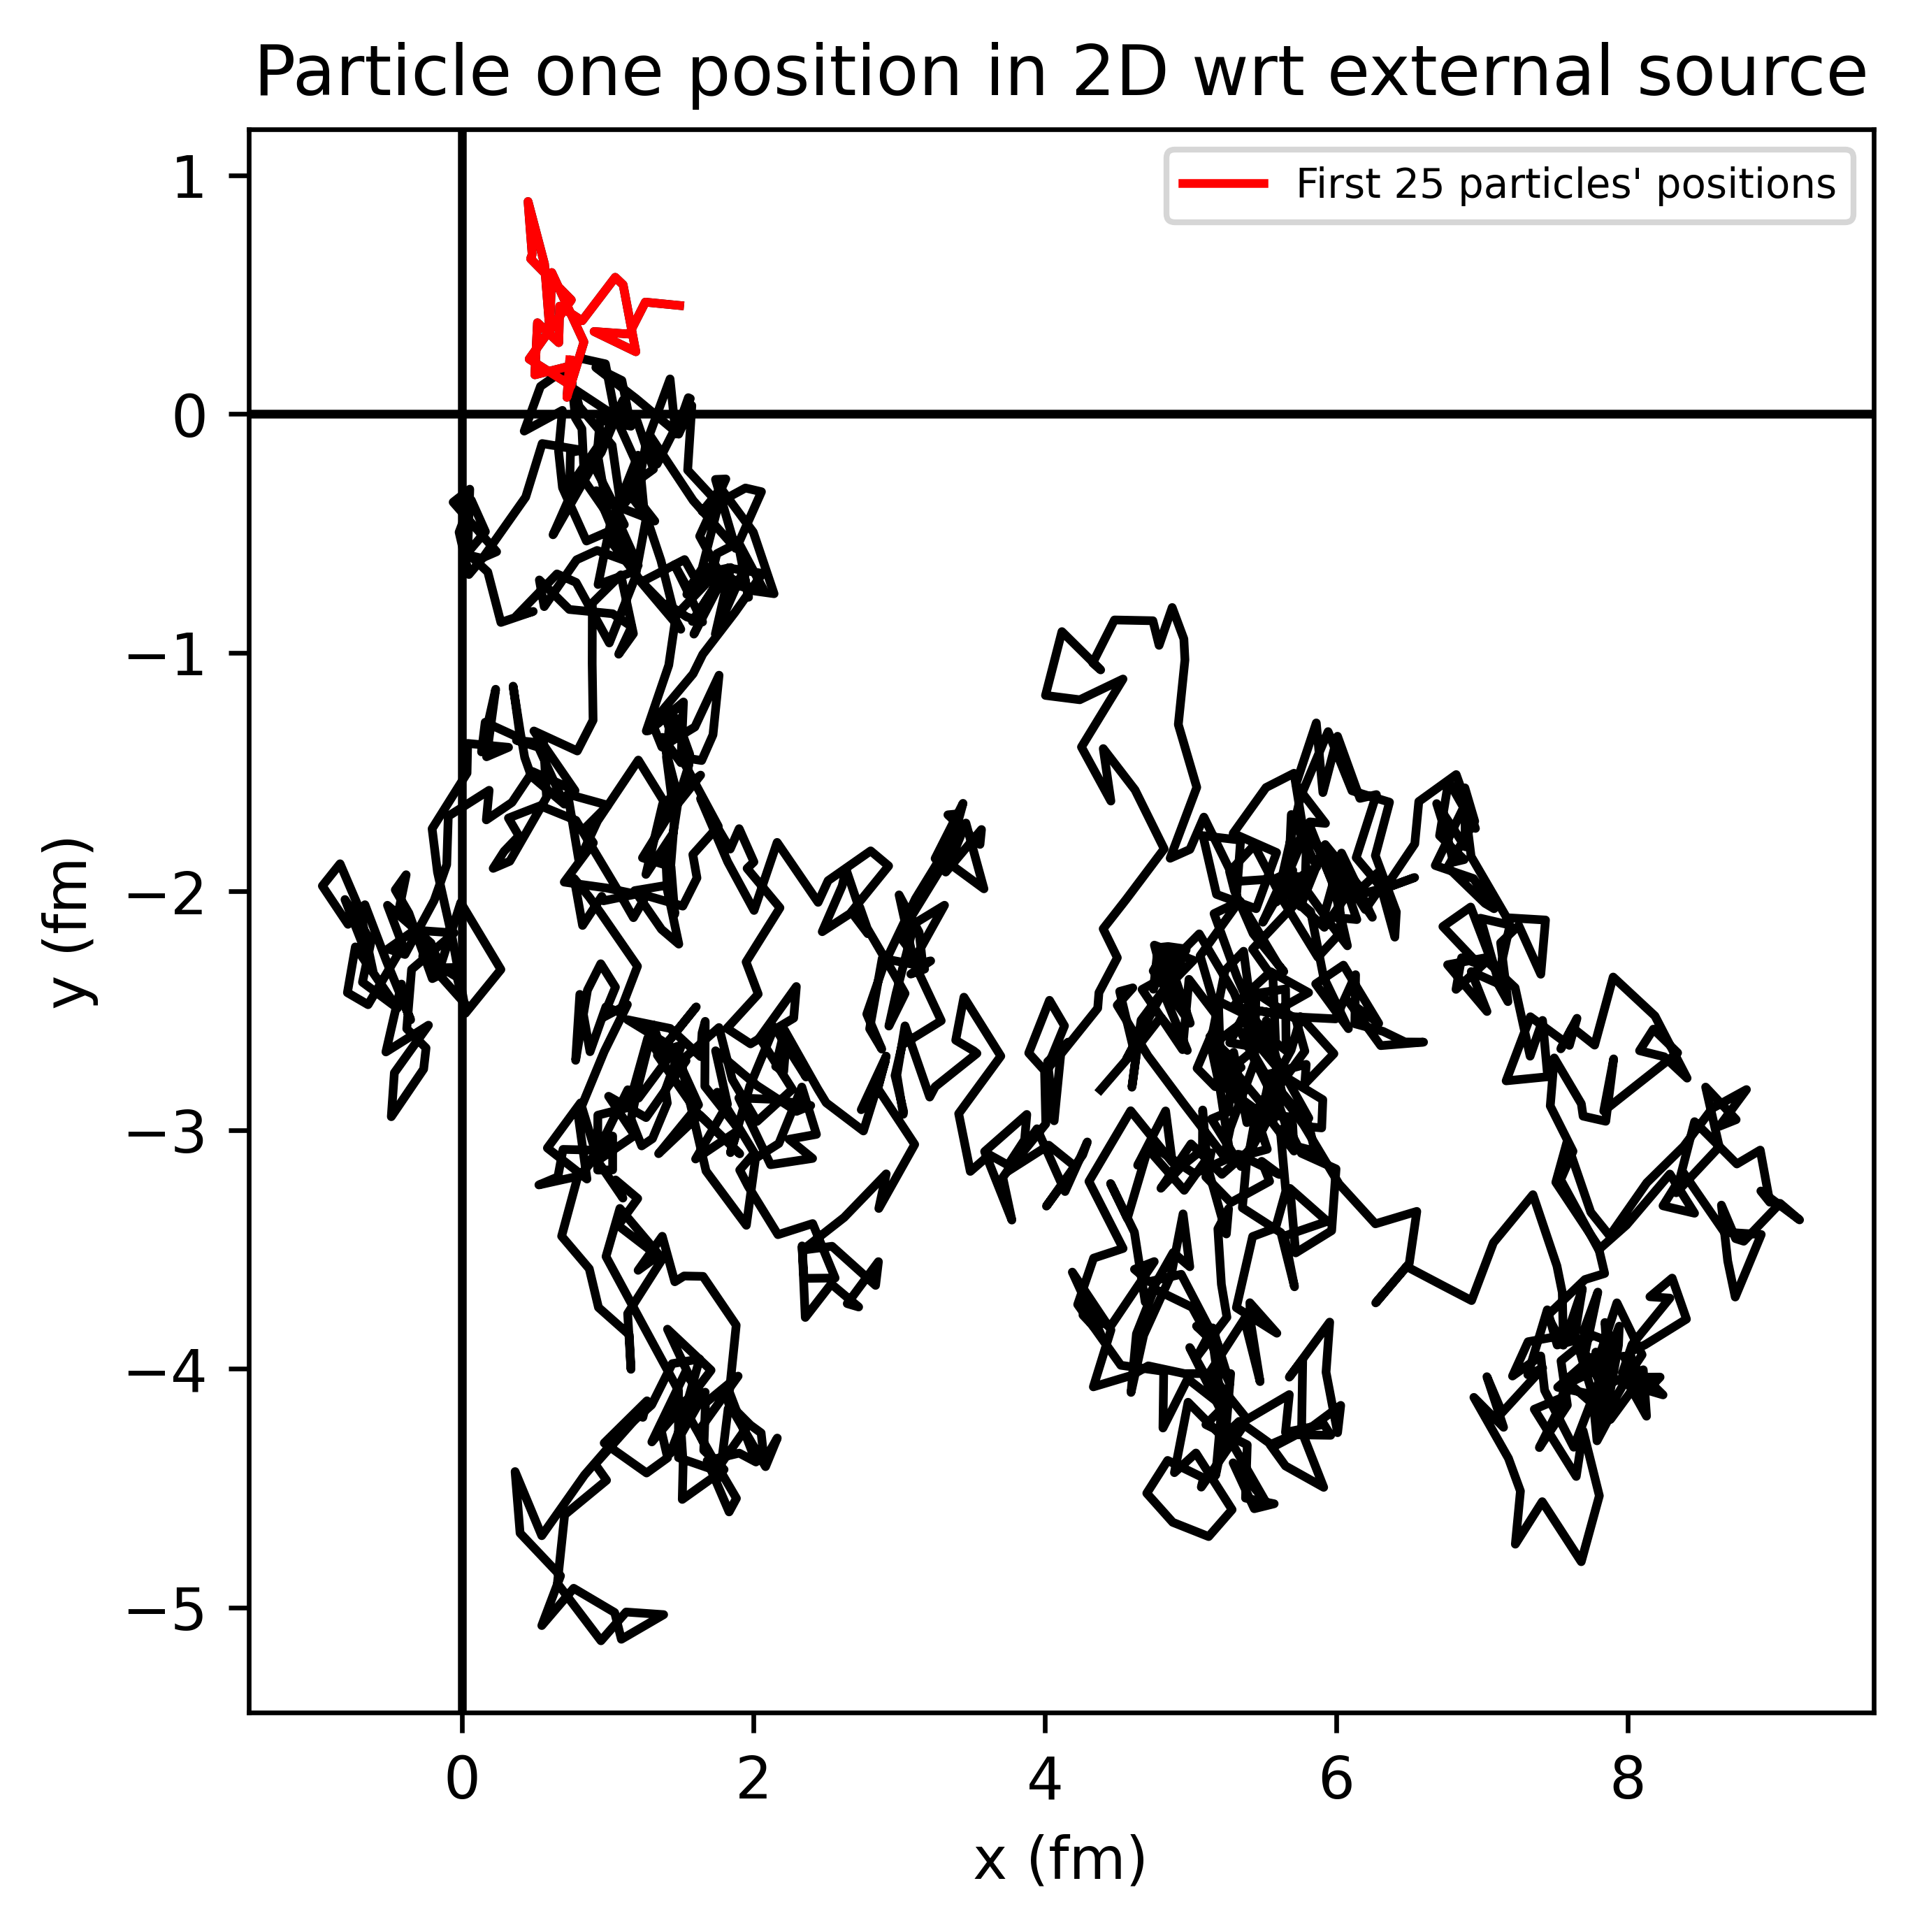

In [29]:
#done by nico    (Questo grafico allungando Len fino a 3600 è bellissimo)
#Questo grafico è dei movimenti della particella 0. Ma dato che la sua lista 
#tiene solo i primi 3600 movimenti lo vedi lungo fino a 10fm
#Il grafico che lo segue invece arriva fino a 40 fm, ma è perchè prende una misura 
#ogni 10 e quindi non satura subito come list_X, ha infirmazioni anche sul futuro della part.

fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.plot(list_X, list_Y, color = "black")
ax.plot(list_X[0:25], list_Y[0:25], color = "red", label= "First 25 particles' positions")
ax.axvline(x=0,color='black')
ax.axhline(y=0, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle one position in 2D wrt external source") #change the name
ax.legend(fontsize = 'x-small')
plt.show()

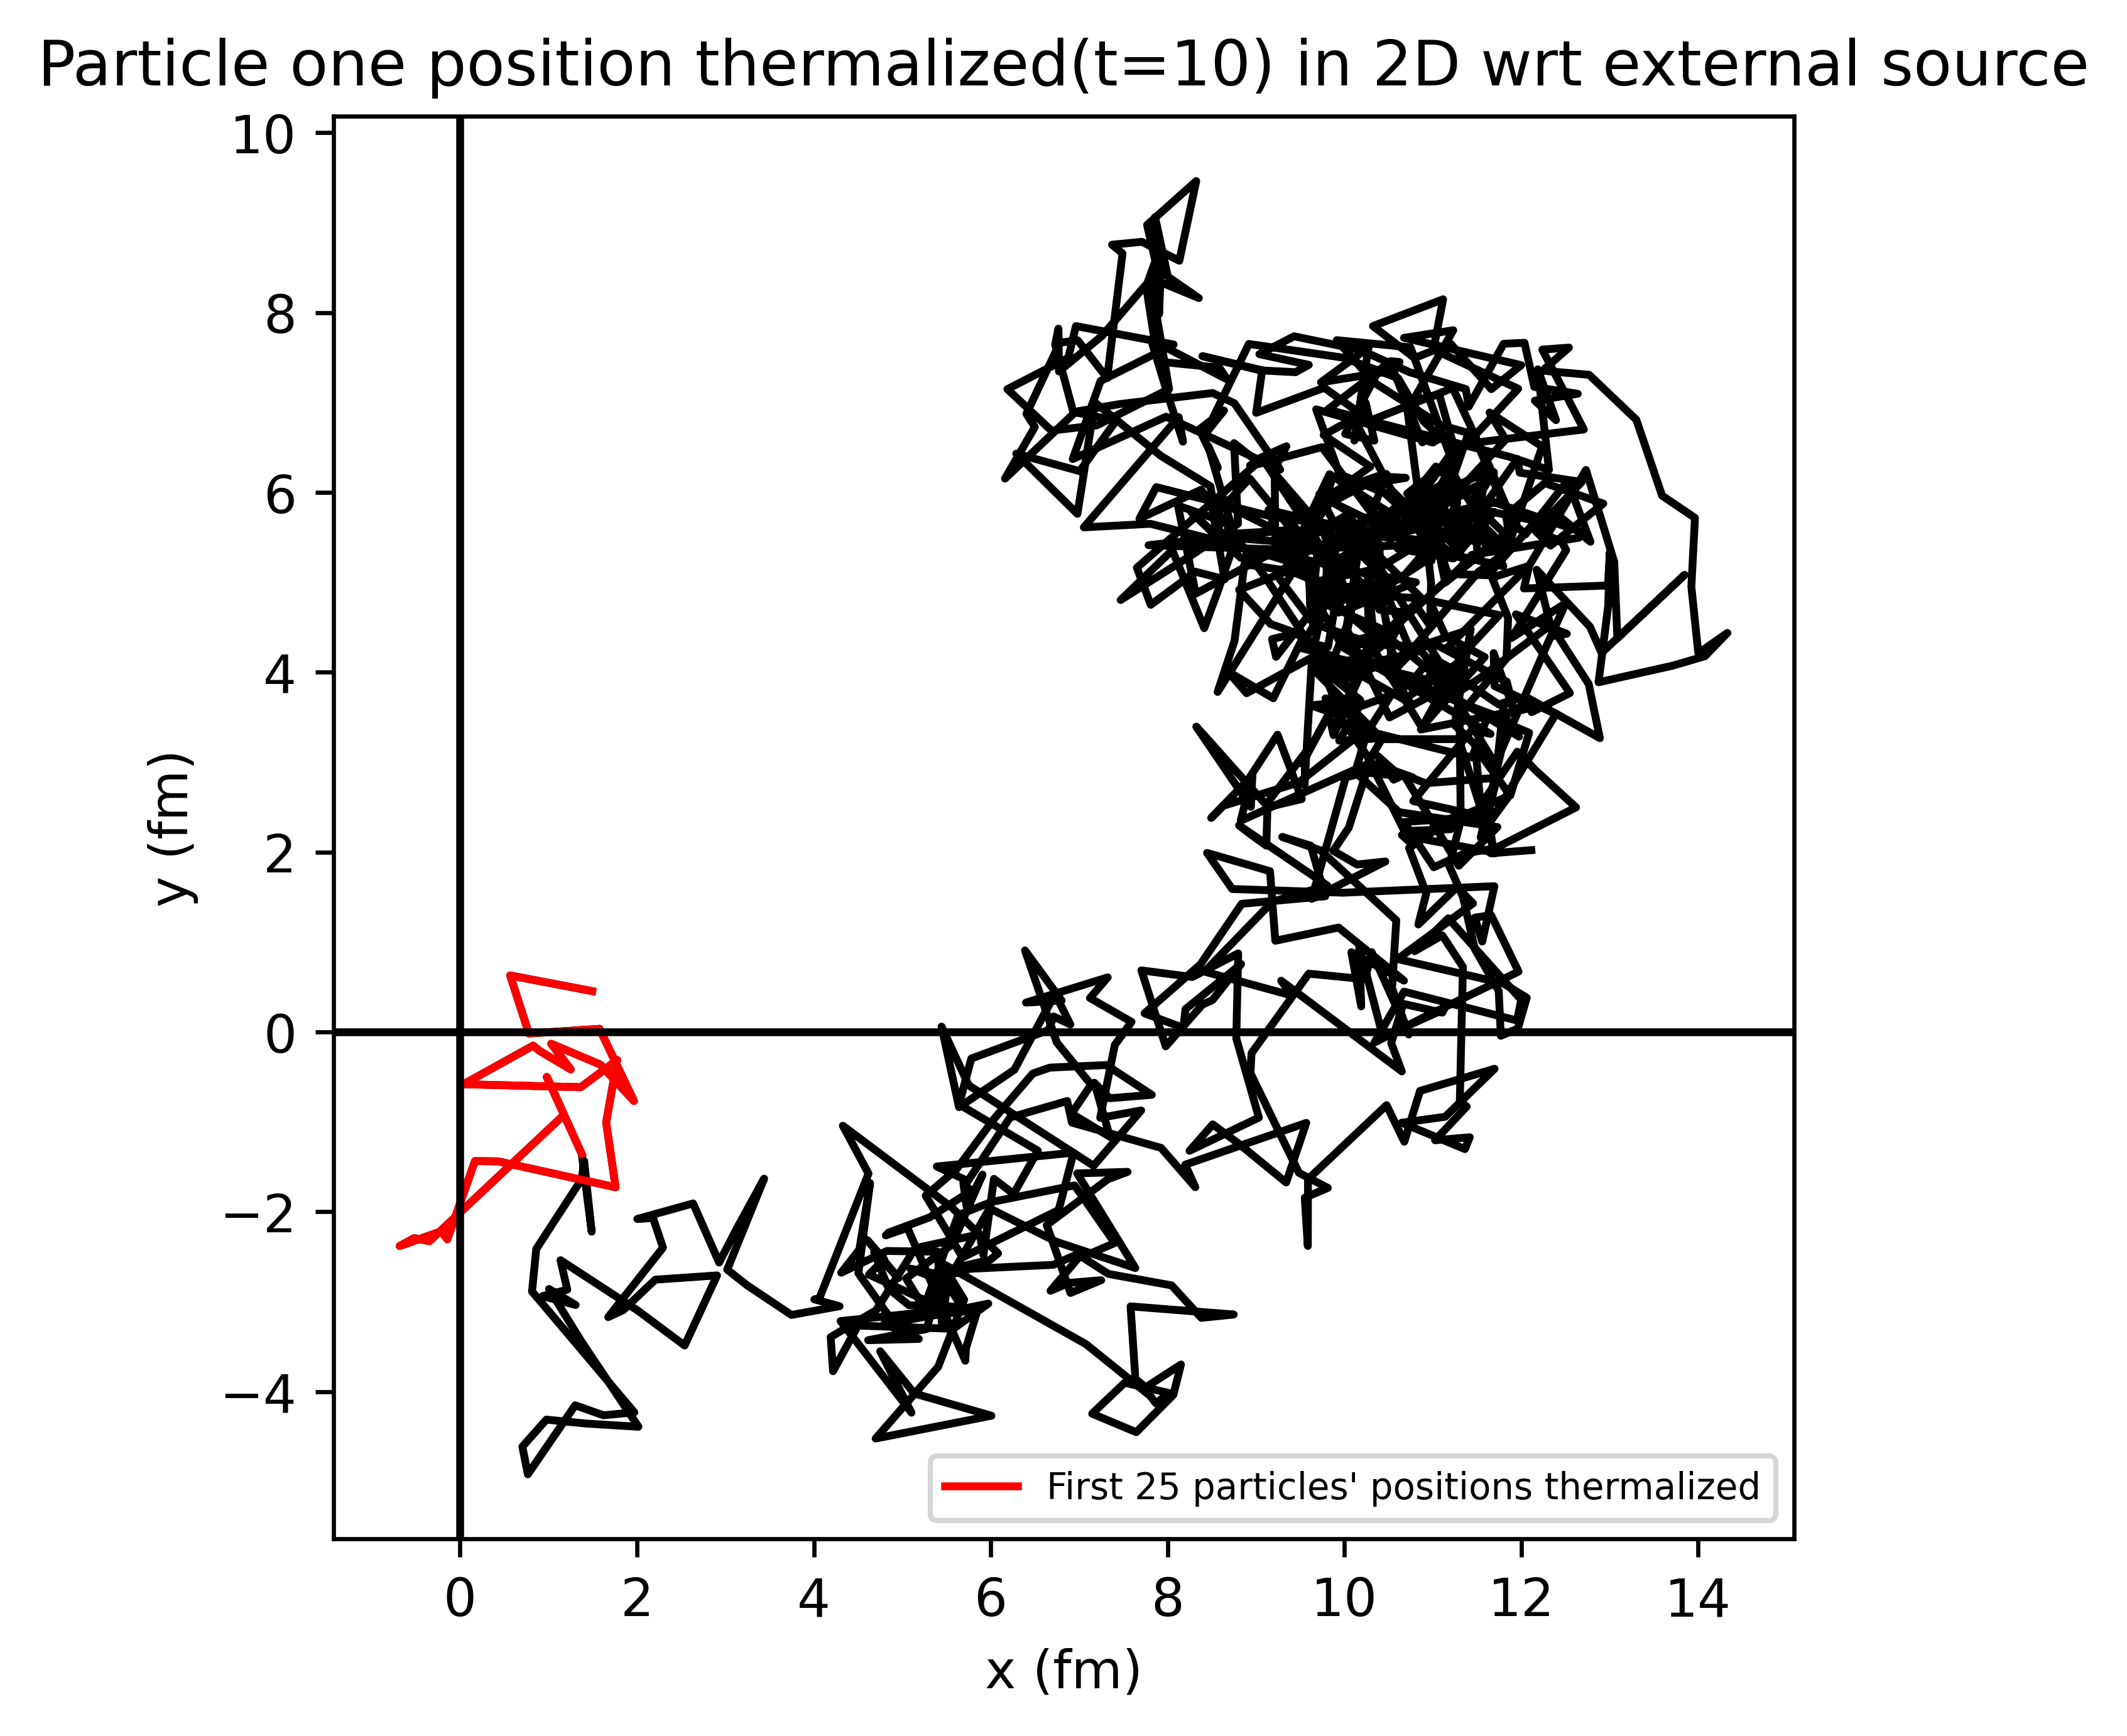

In [30]:
#---(con Len=3600 questo grafico anche è bellissimo)

fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.plot(list_X_t, list_Y_t, color = "black")
ax.plot(list_X_t[0:25], list_Y_t[0:25], color = "red", label= "First 25 particles' positions thermalized")
ax.axvline(x=0,color='black')
ax.axhline(y=0, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle one position thermalized(t=10) in 2D wrt external source")
ax.legend(fontsize = 'x-small')
plt.show()

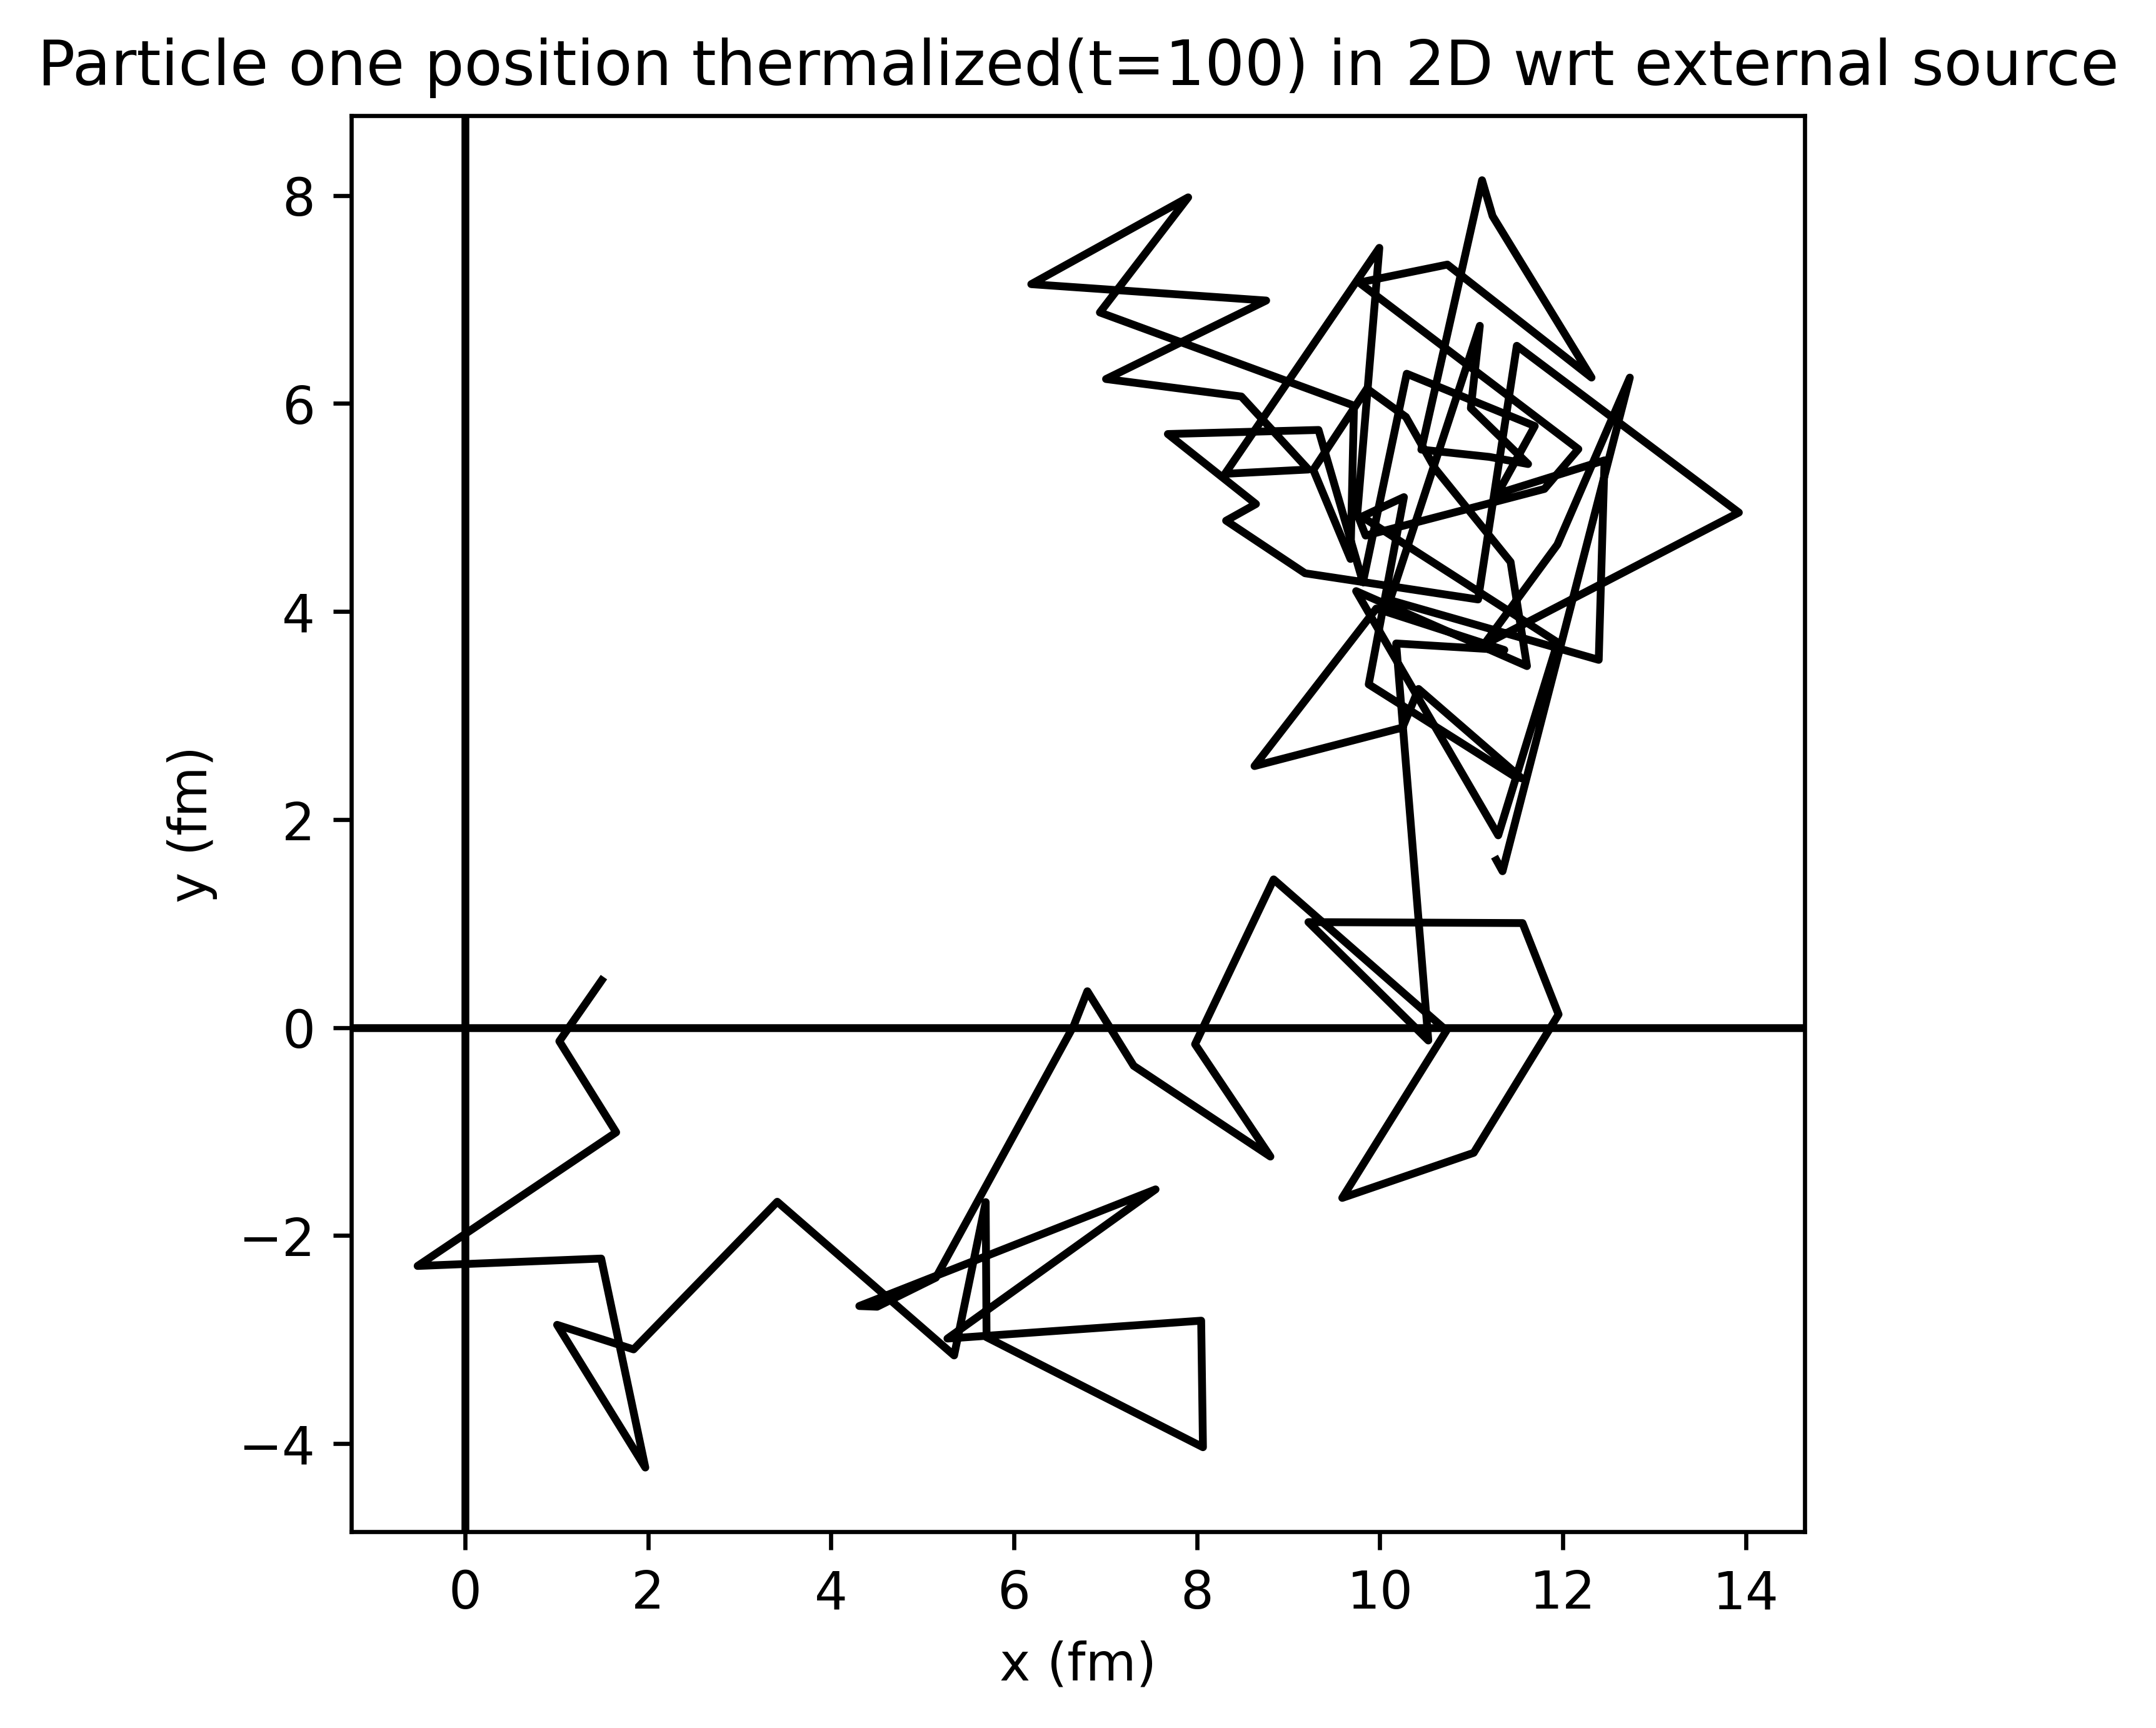

In [31]:
#-----Done by nico (Con NM=12000*4 questo grafico diventa significativo, mentre prima non lo era)

fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.plot(list_X_T, list_Y_T, color = "black")
ax.axvline(x=0,color='black')
ax.axhline(y=0, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle one position thermalized(t=100) in 2D wrt external source")
plt.show()

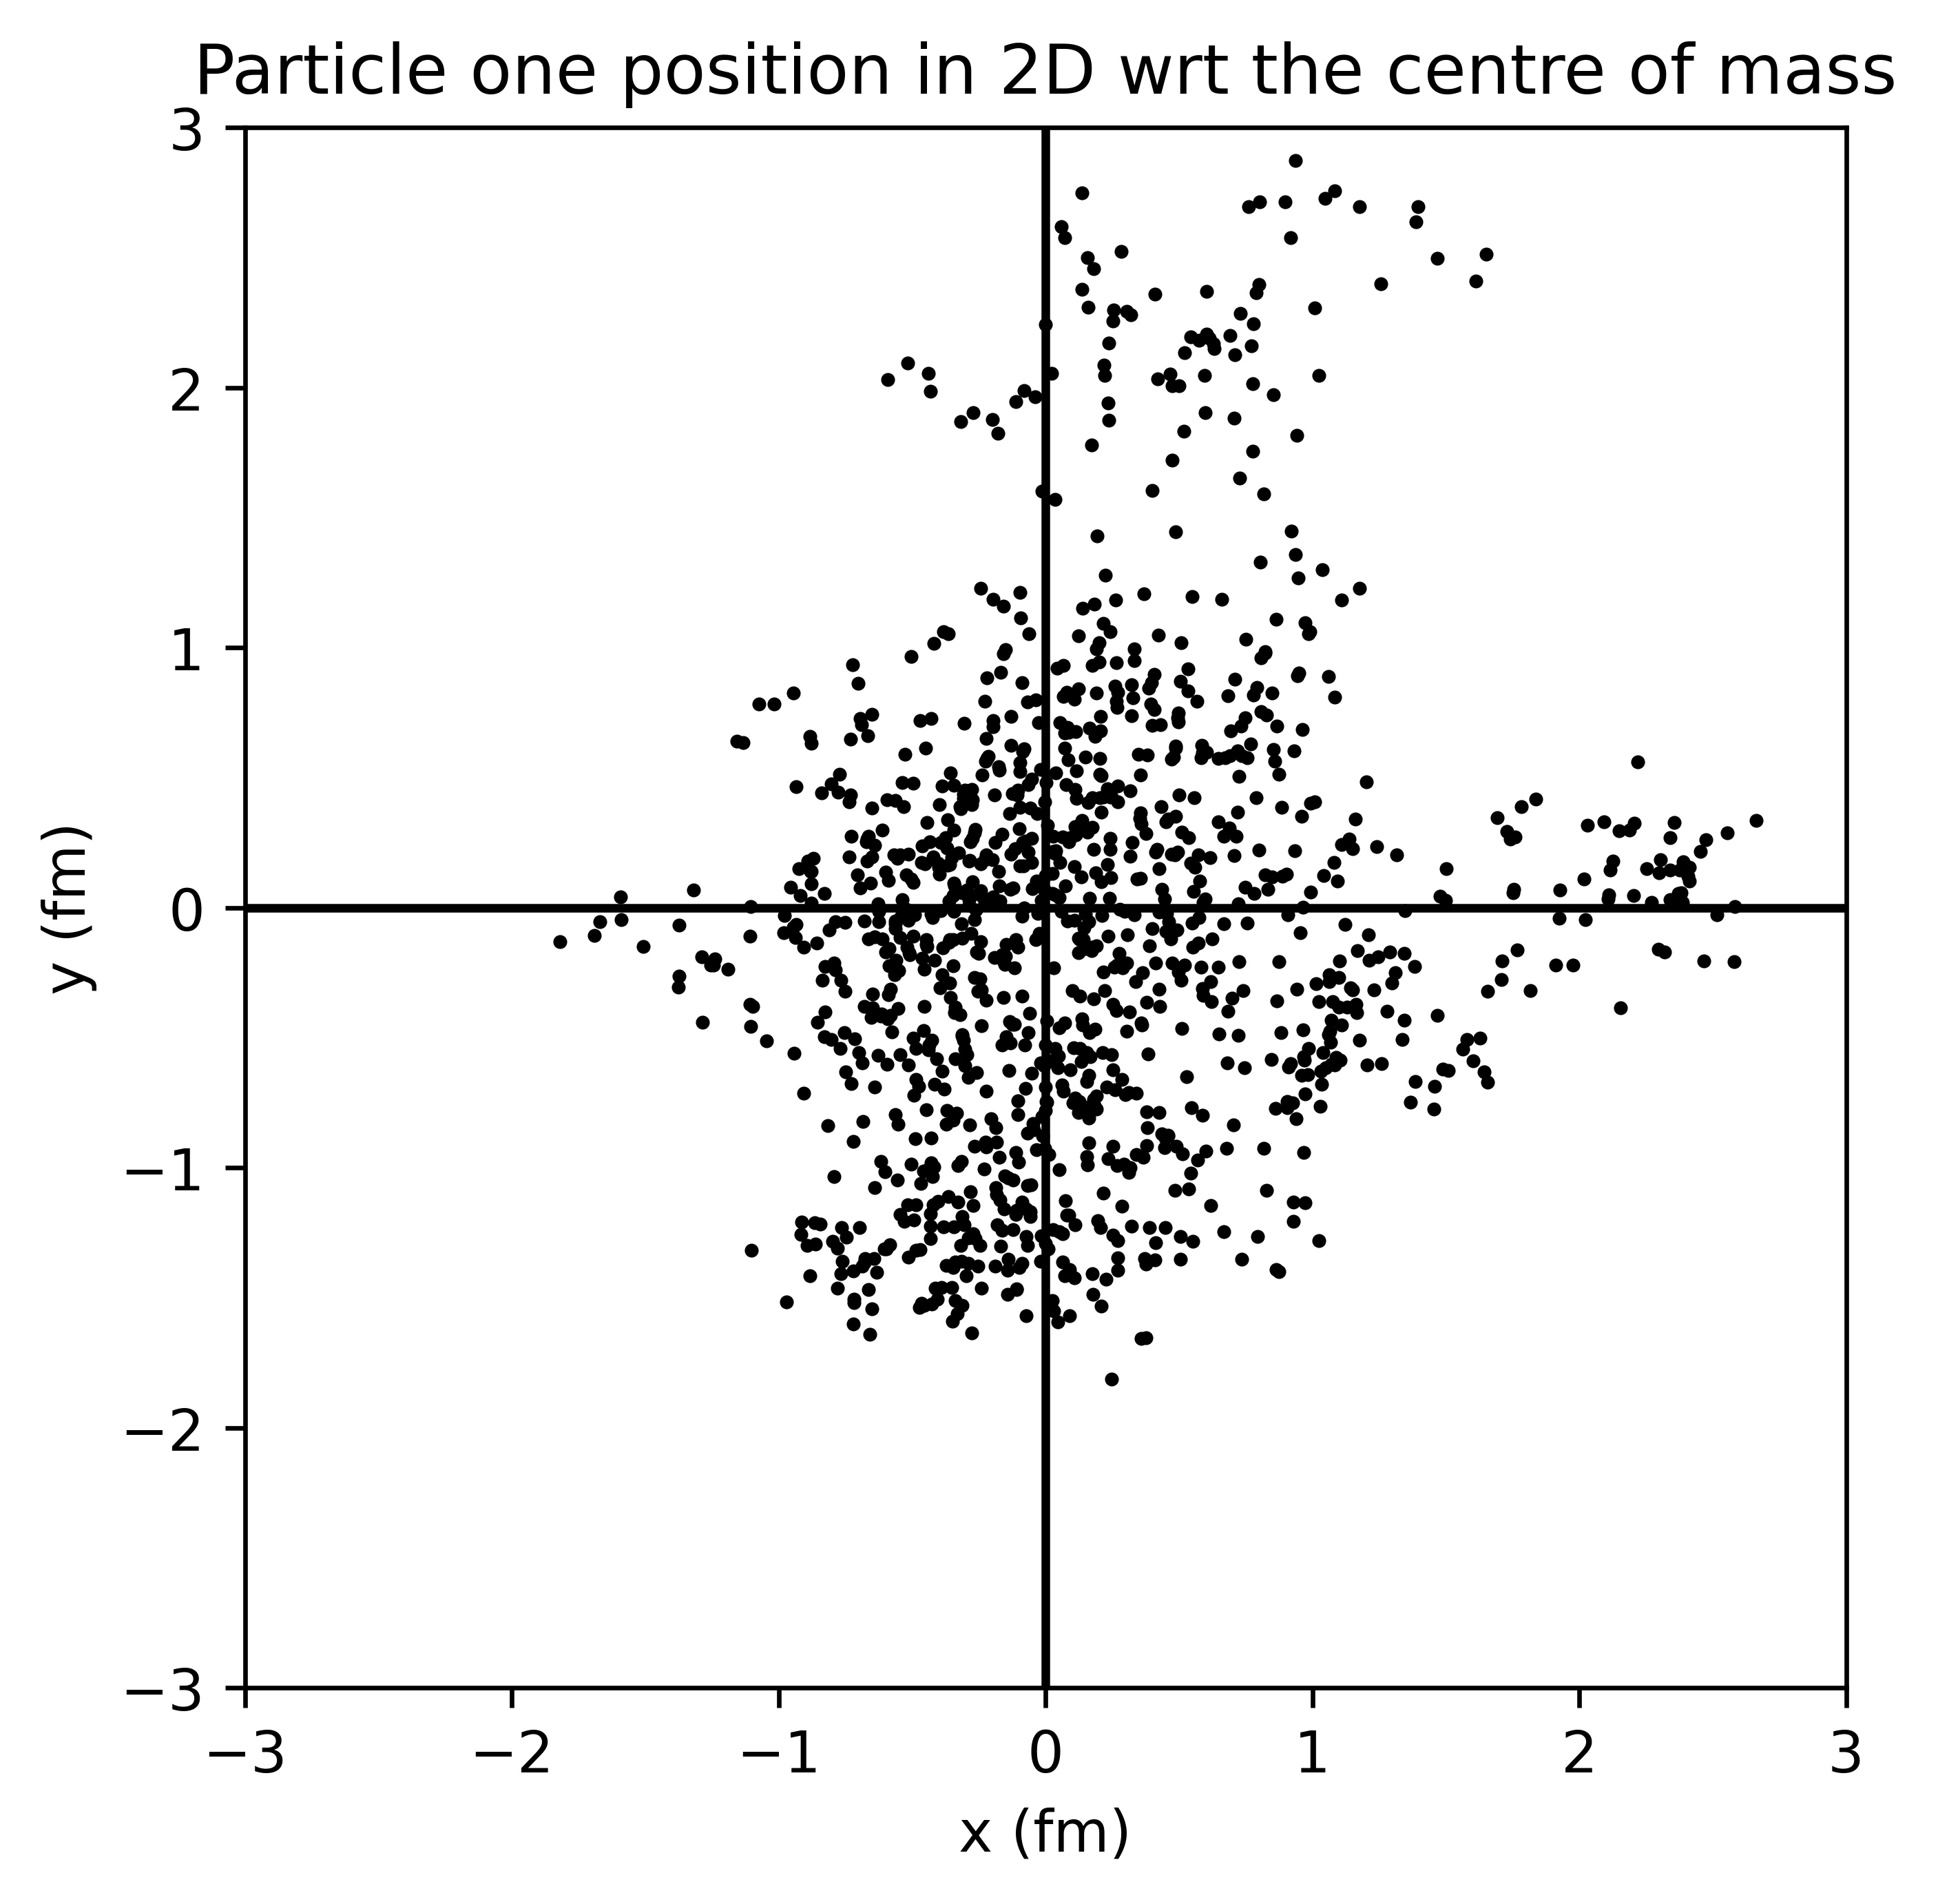

In [32]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.scatter(list_X_cm, list_Y_cm, s= 2,c = "black"  )
ax.set_xlim(-3, 3) 
ax.set_ylim(-3, 3) 
ax.vlines(0,-3,3,colors='black')
ax.hlines(0,-3,3,colors='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
ax.set_title("Particle one position in 2D wrt the centre of mass")
plt.show()

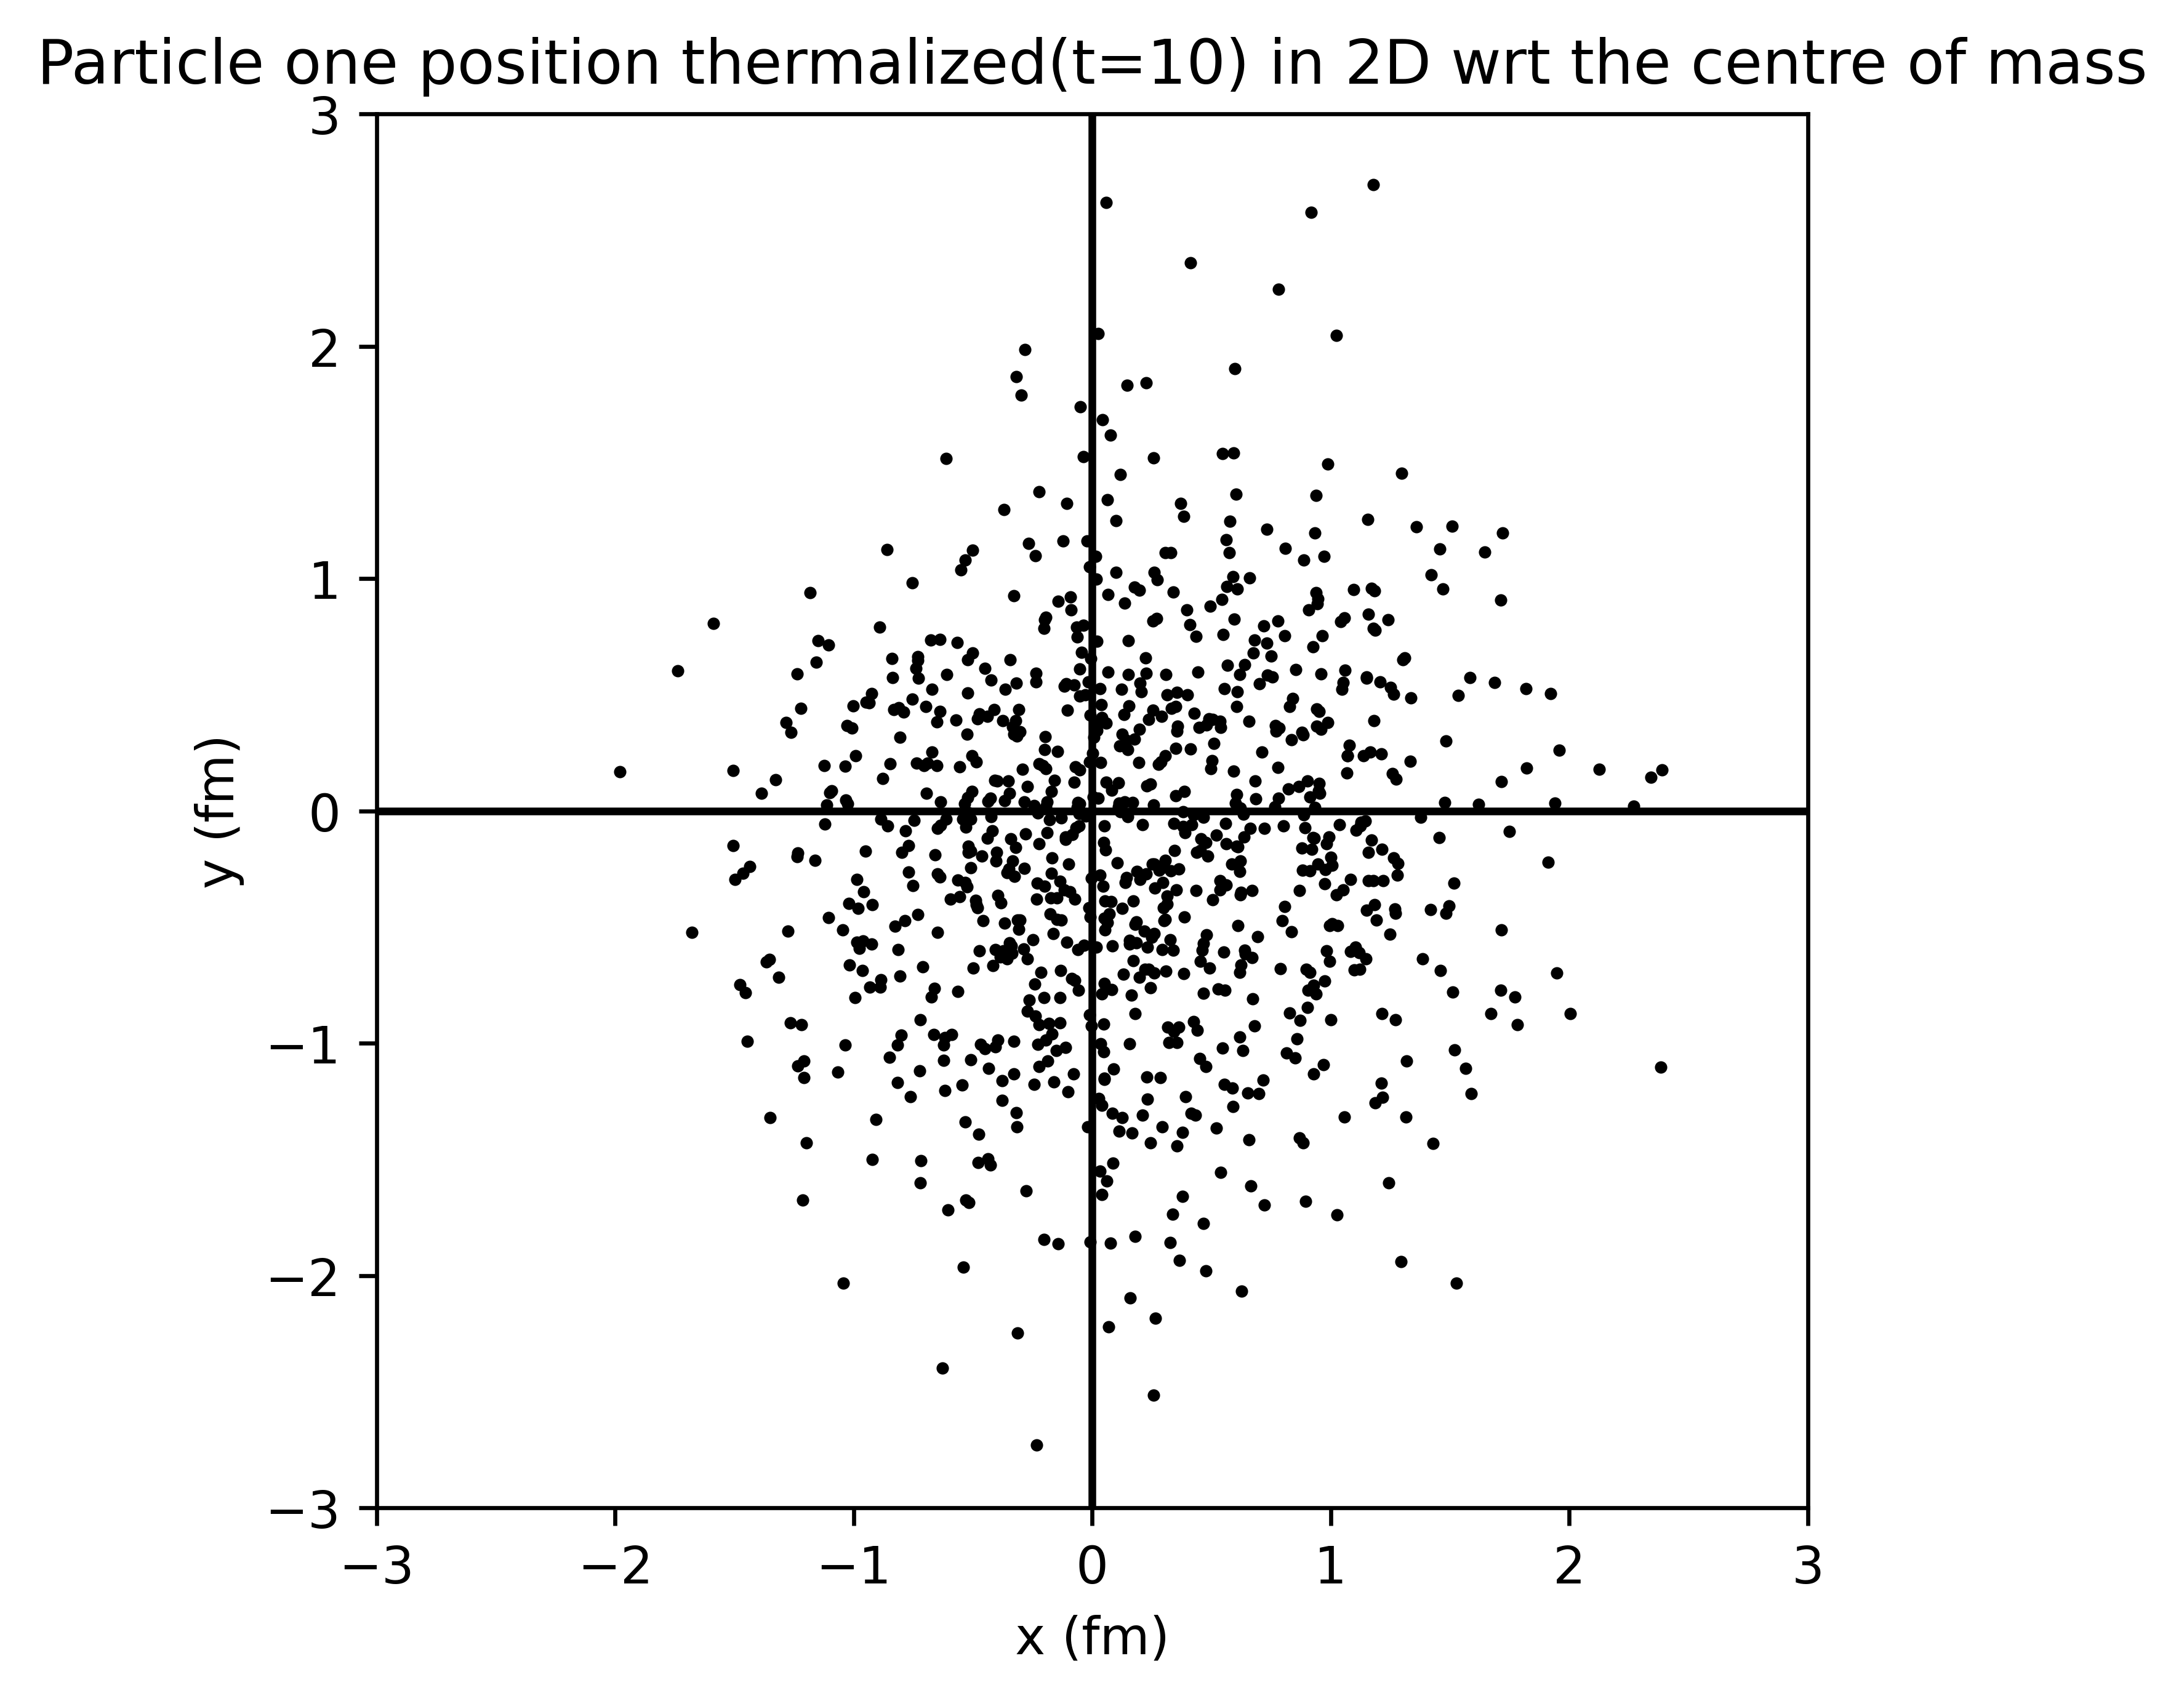

In [33]:
plt.figure(figsize=(5, 5), dpi=600)
plt.scatter(list_X_cm_t, list_Y_cm_t, s= 2,c = "black"  )
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(-3, 3)  # Set y-axis limits
plt.vlines(0,-3,3,colors='black')
plt.hlines(0,-3,3,colors='black')
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
plt.title("Particle one position thermalized(t=10) in 2D wrt the centre of mass")
plt.show()

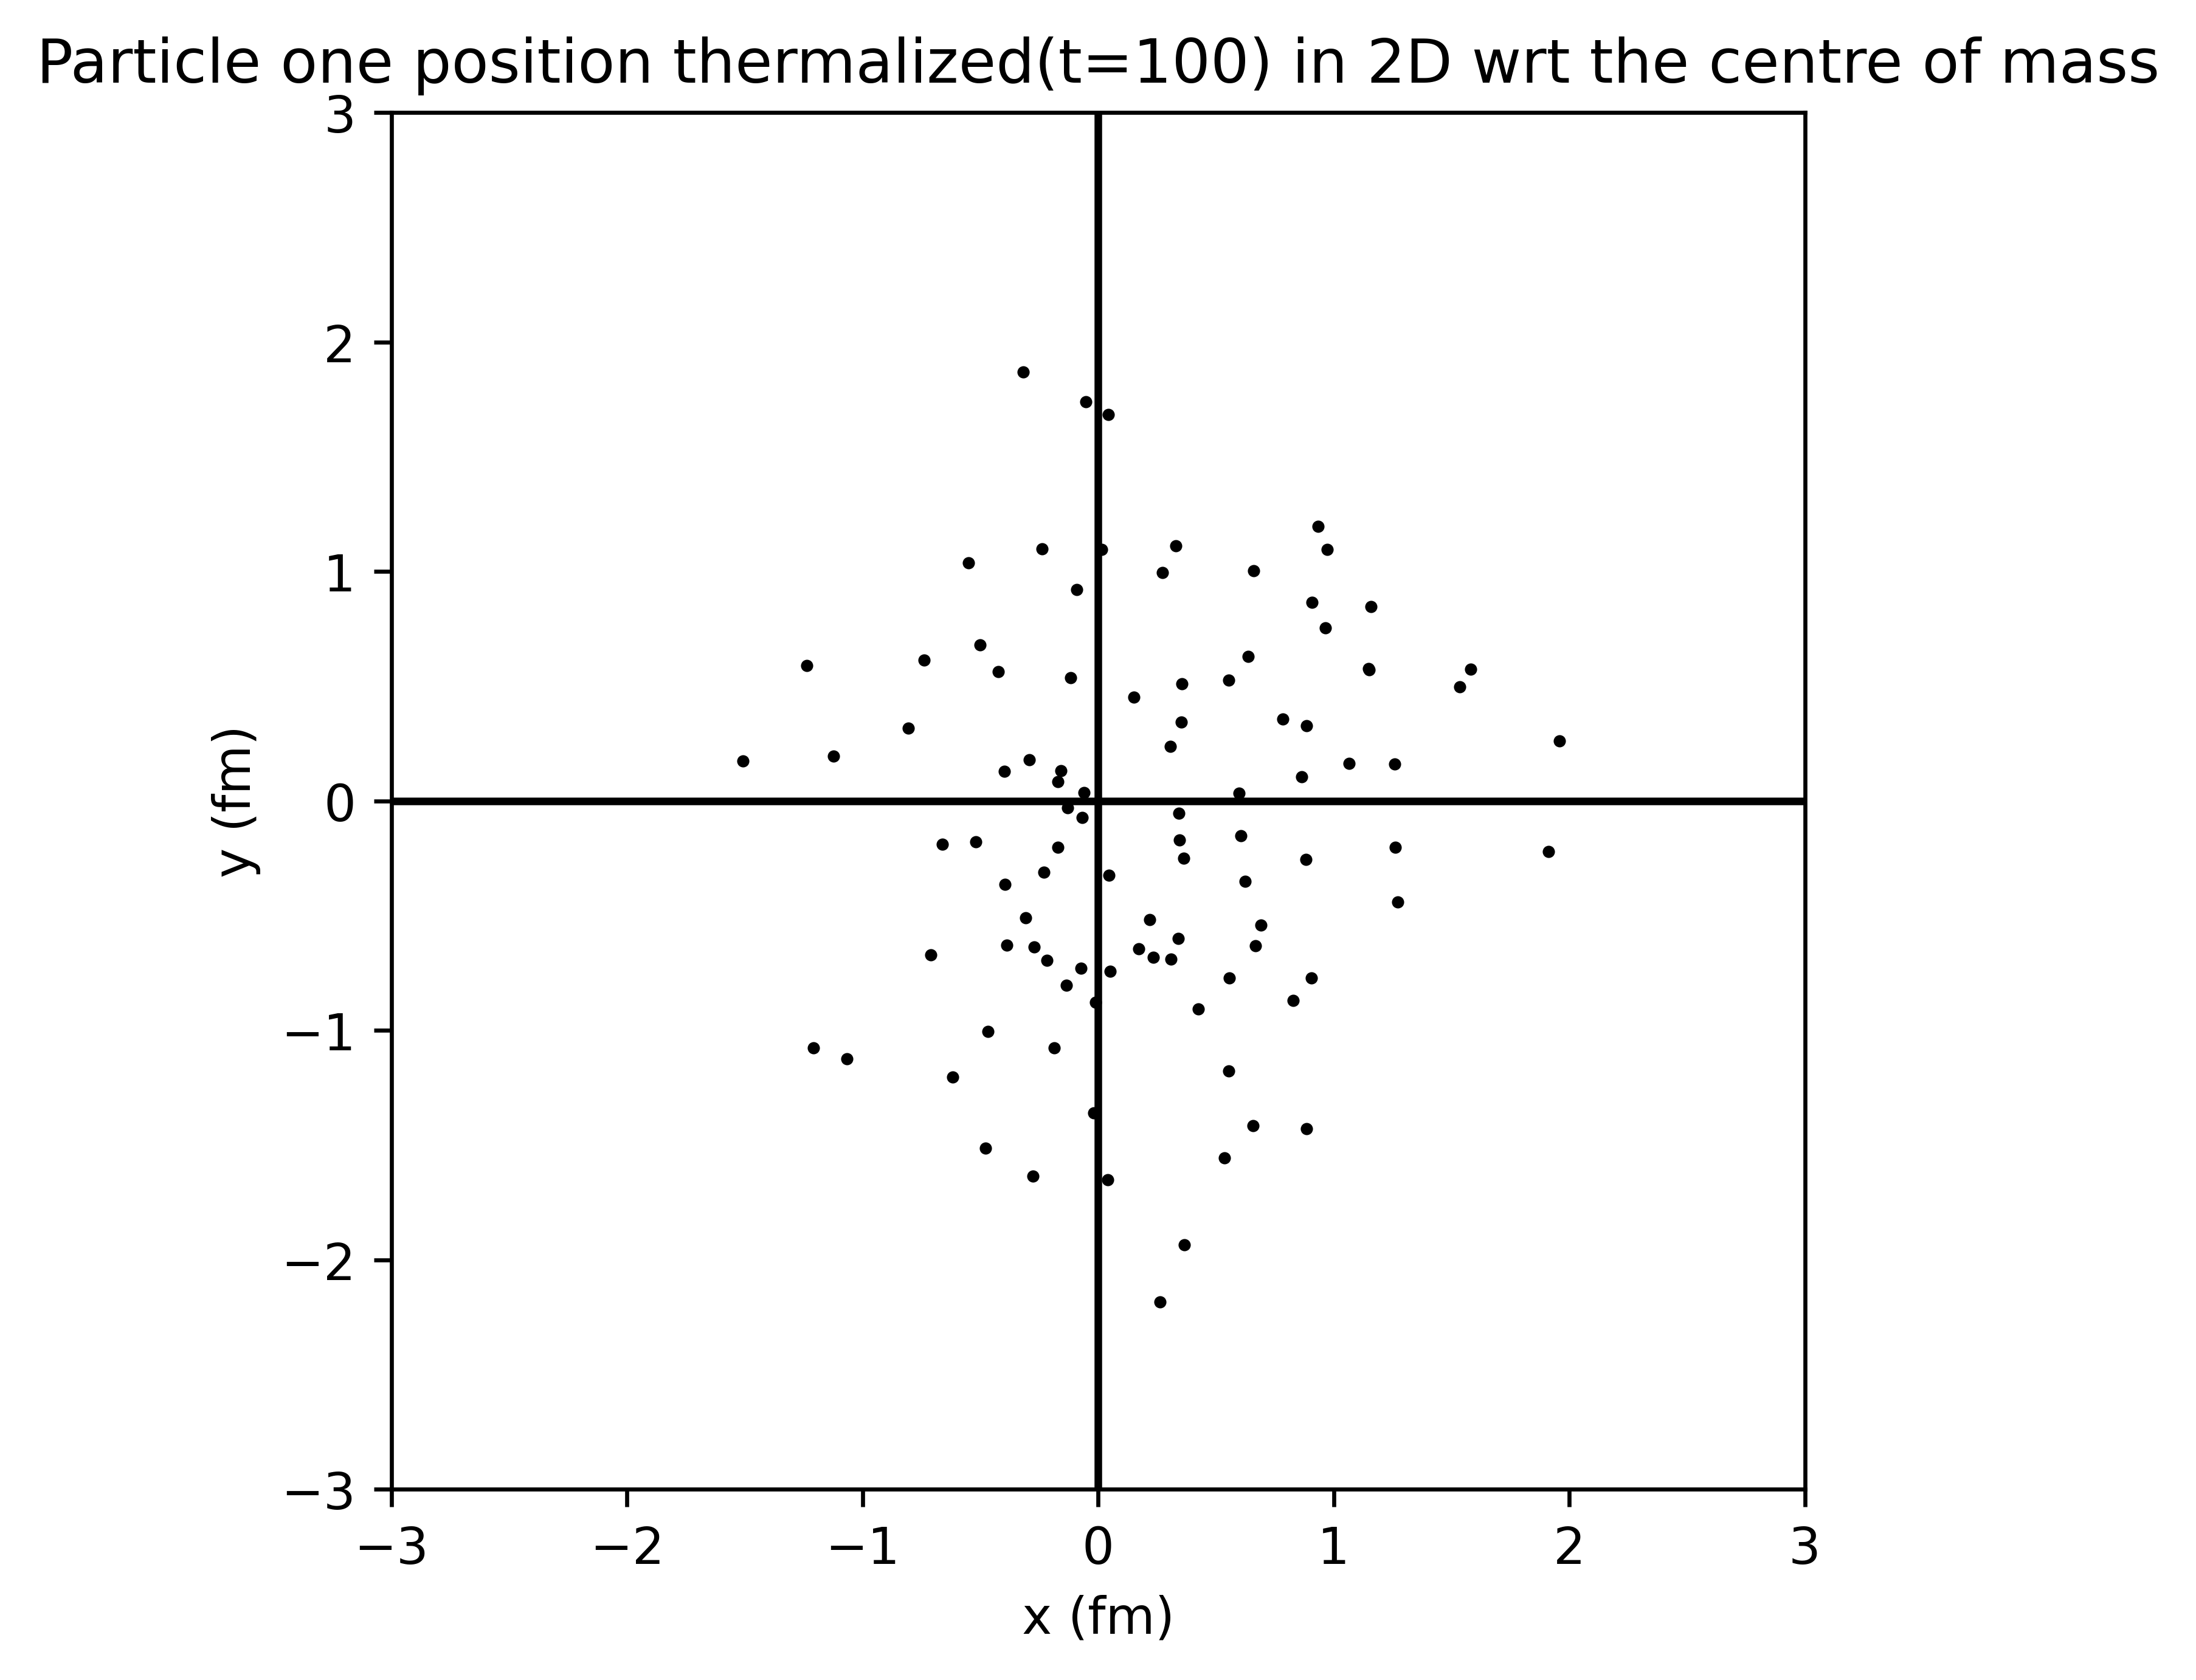

In [34]:
#-----Done by nico

plt.figure(figsize=(5, 5), dpi=600)
plt.scatter(list_X_cm_T, list_Y_cm_T, s= 2,c = "black"  )
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(-3, 3)  # Set y-axis limits
plt.vlines(0,-3,3,colors='black')
plt.hlines(0,-3,3,colors='black')
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
plt.title("Particle one position thermalized(t=100) in 2D wrt the centre of mass")
plt.show()

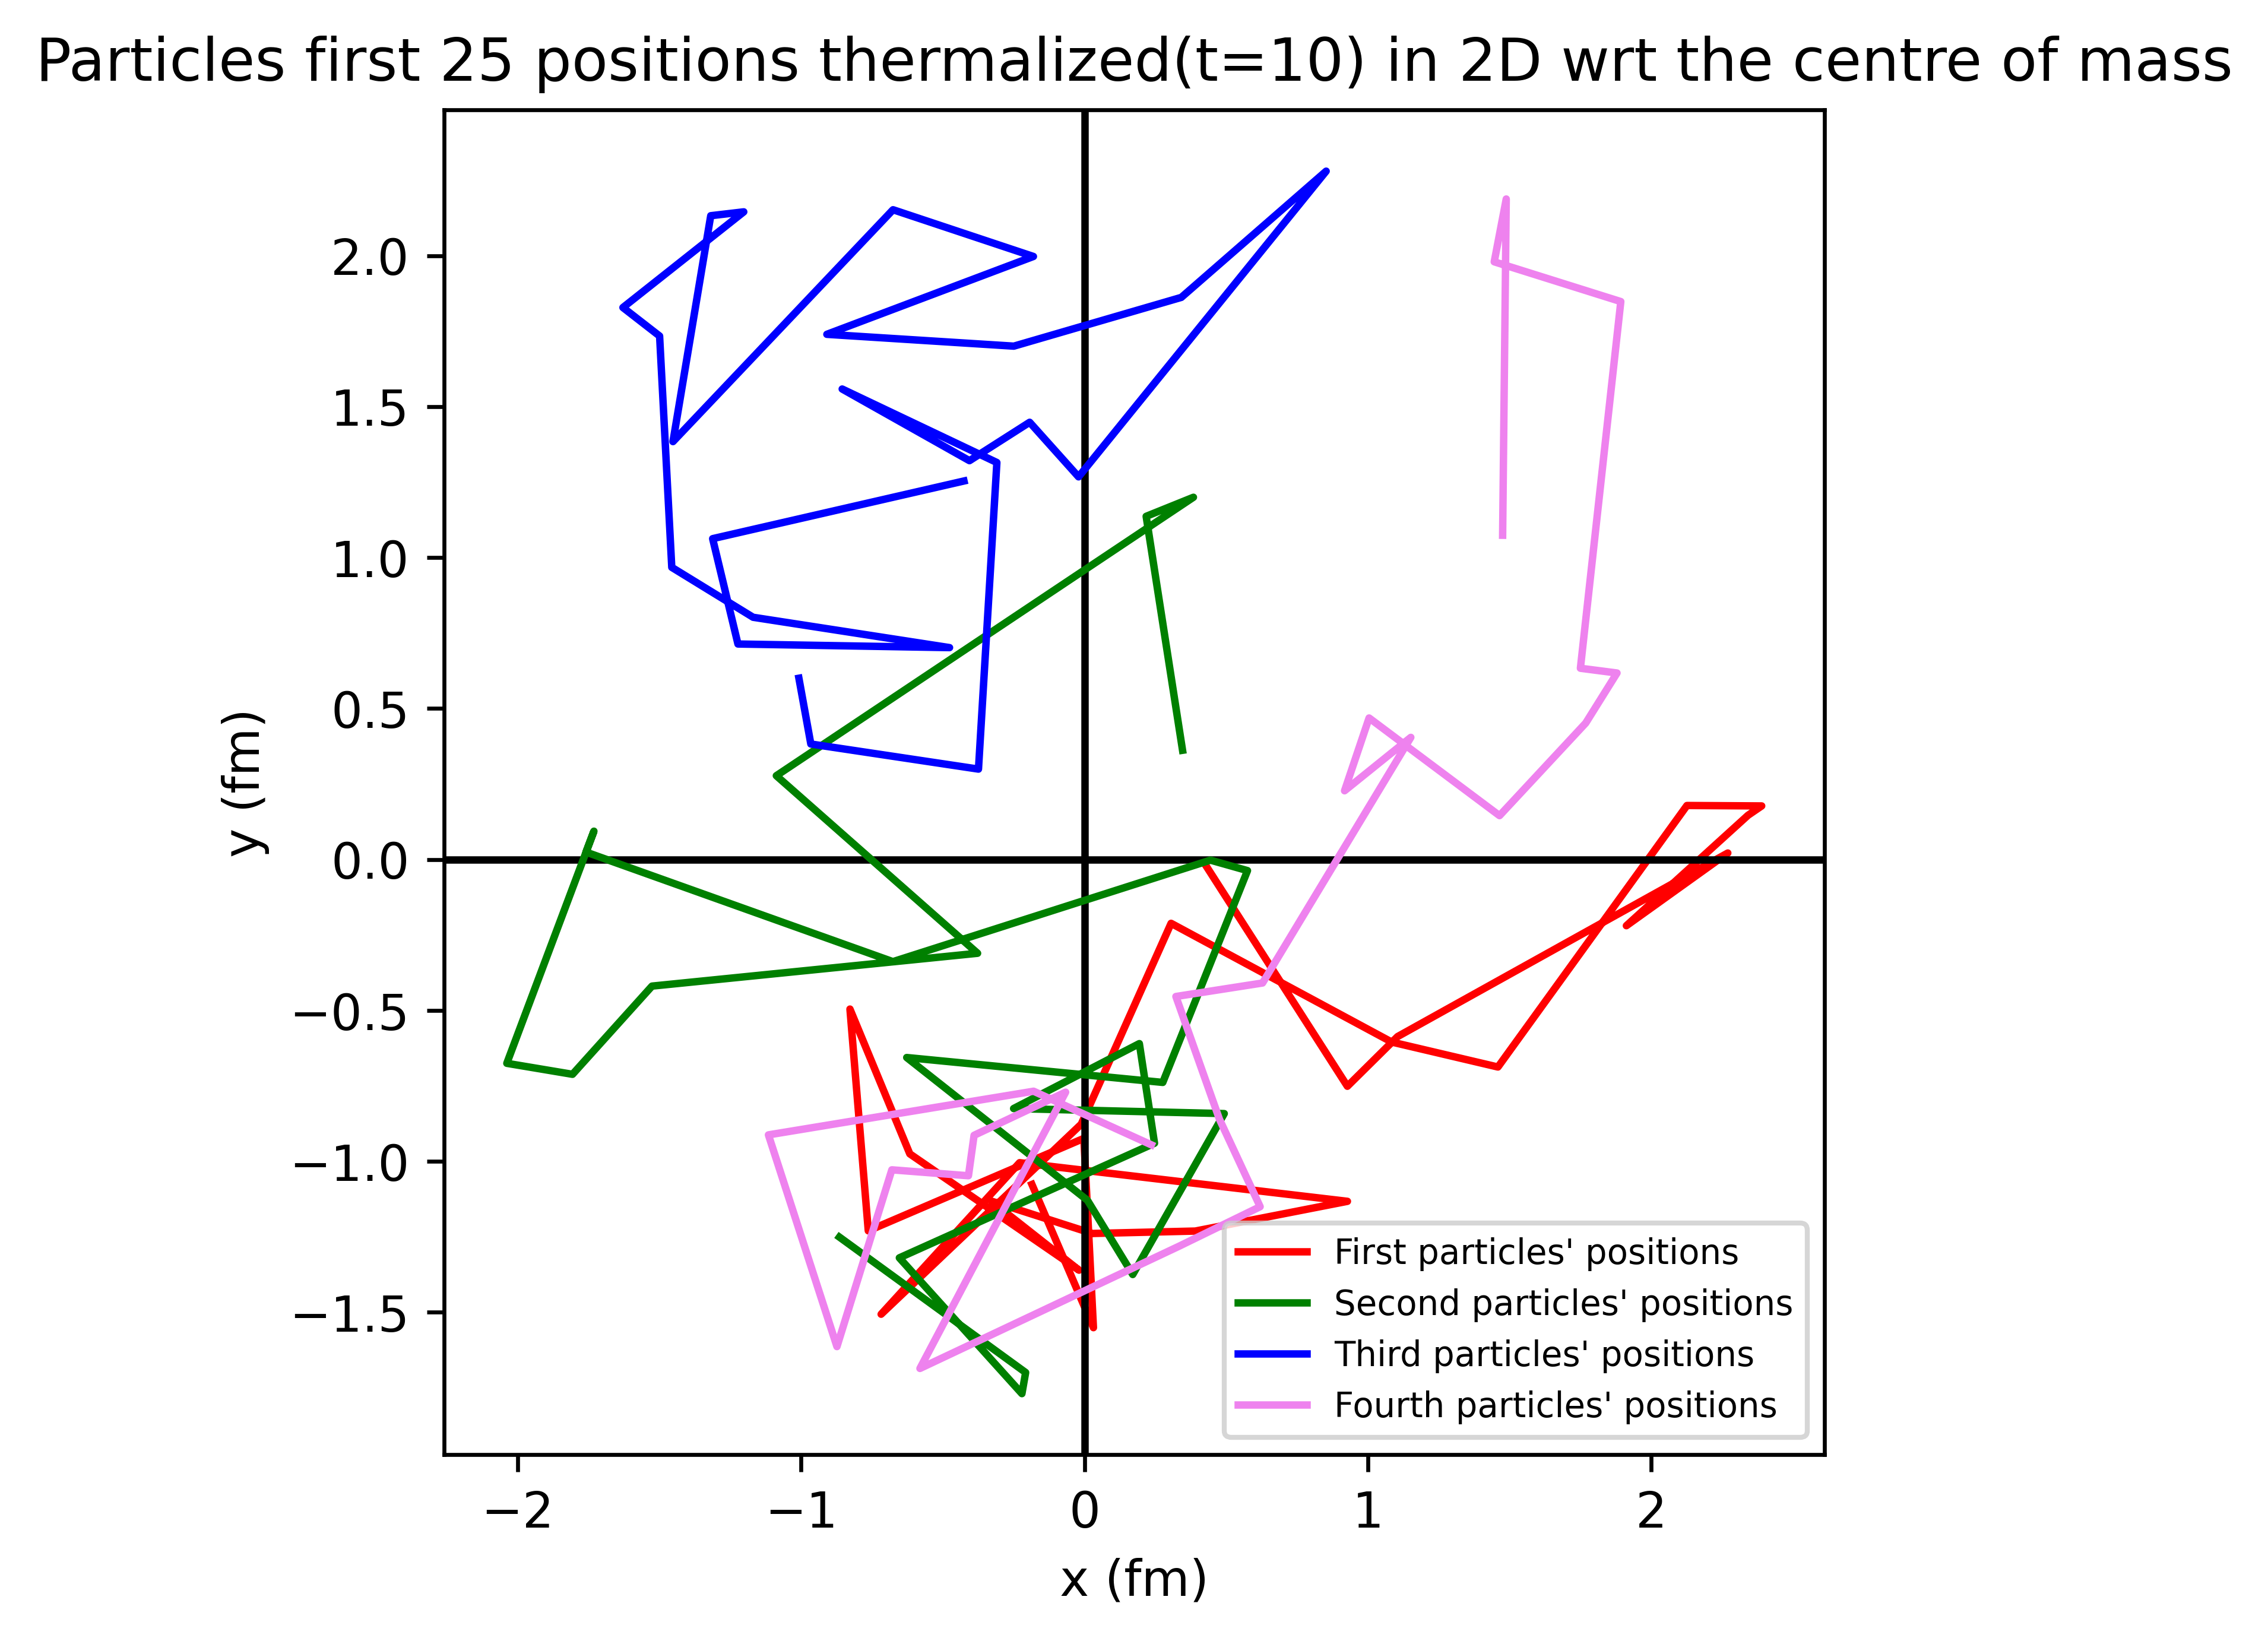

In [35]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.plot(list_X_cm_t[0:25], list_Y_cm_t[0:25], color = "red", label= "First particles' positions")
ax.axvline(x=0,color='black')
ax.axhline(y=0, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
ax.plot(list_X_cm_t_2[0:25], list_Y_cm_t_2[0:25], c="green", label = "Second particles' positions")
ax.plot(list_X_cm_t_3[0:25], list_Y_cm_t_3[0:25], c="blue", label = "Third particles' positions")
ax.plot(list_X_cm_t_4[0:25], list_Y_cm_t_4[0:25], c="violet", label = "Fourth particles' positions")
ax.set_title("Particles first 25 positions thermalized(t=10) in 2D wrt the centre of mass")
ax.legend(fontsize = 'x-small')
plt.show()

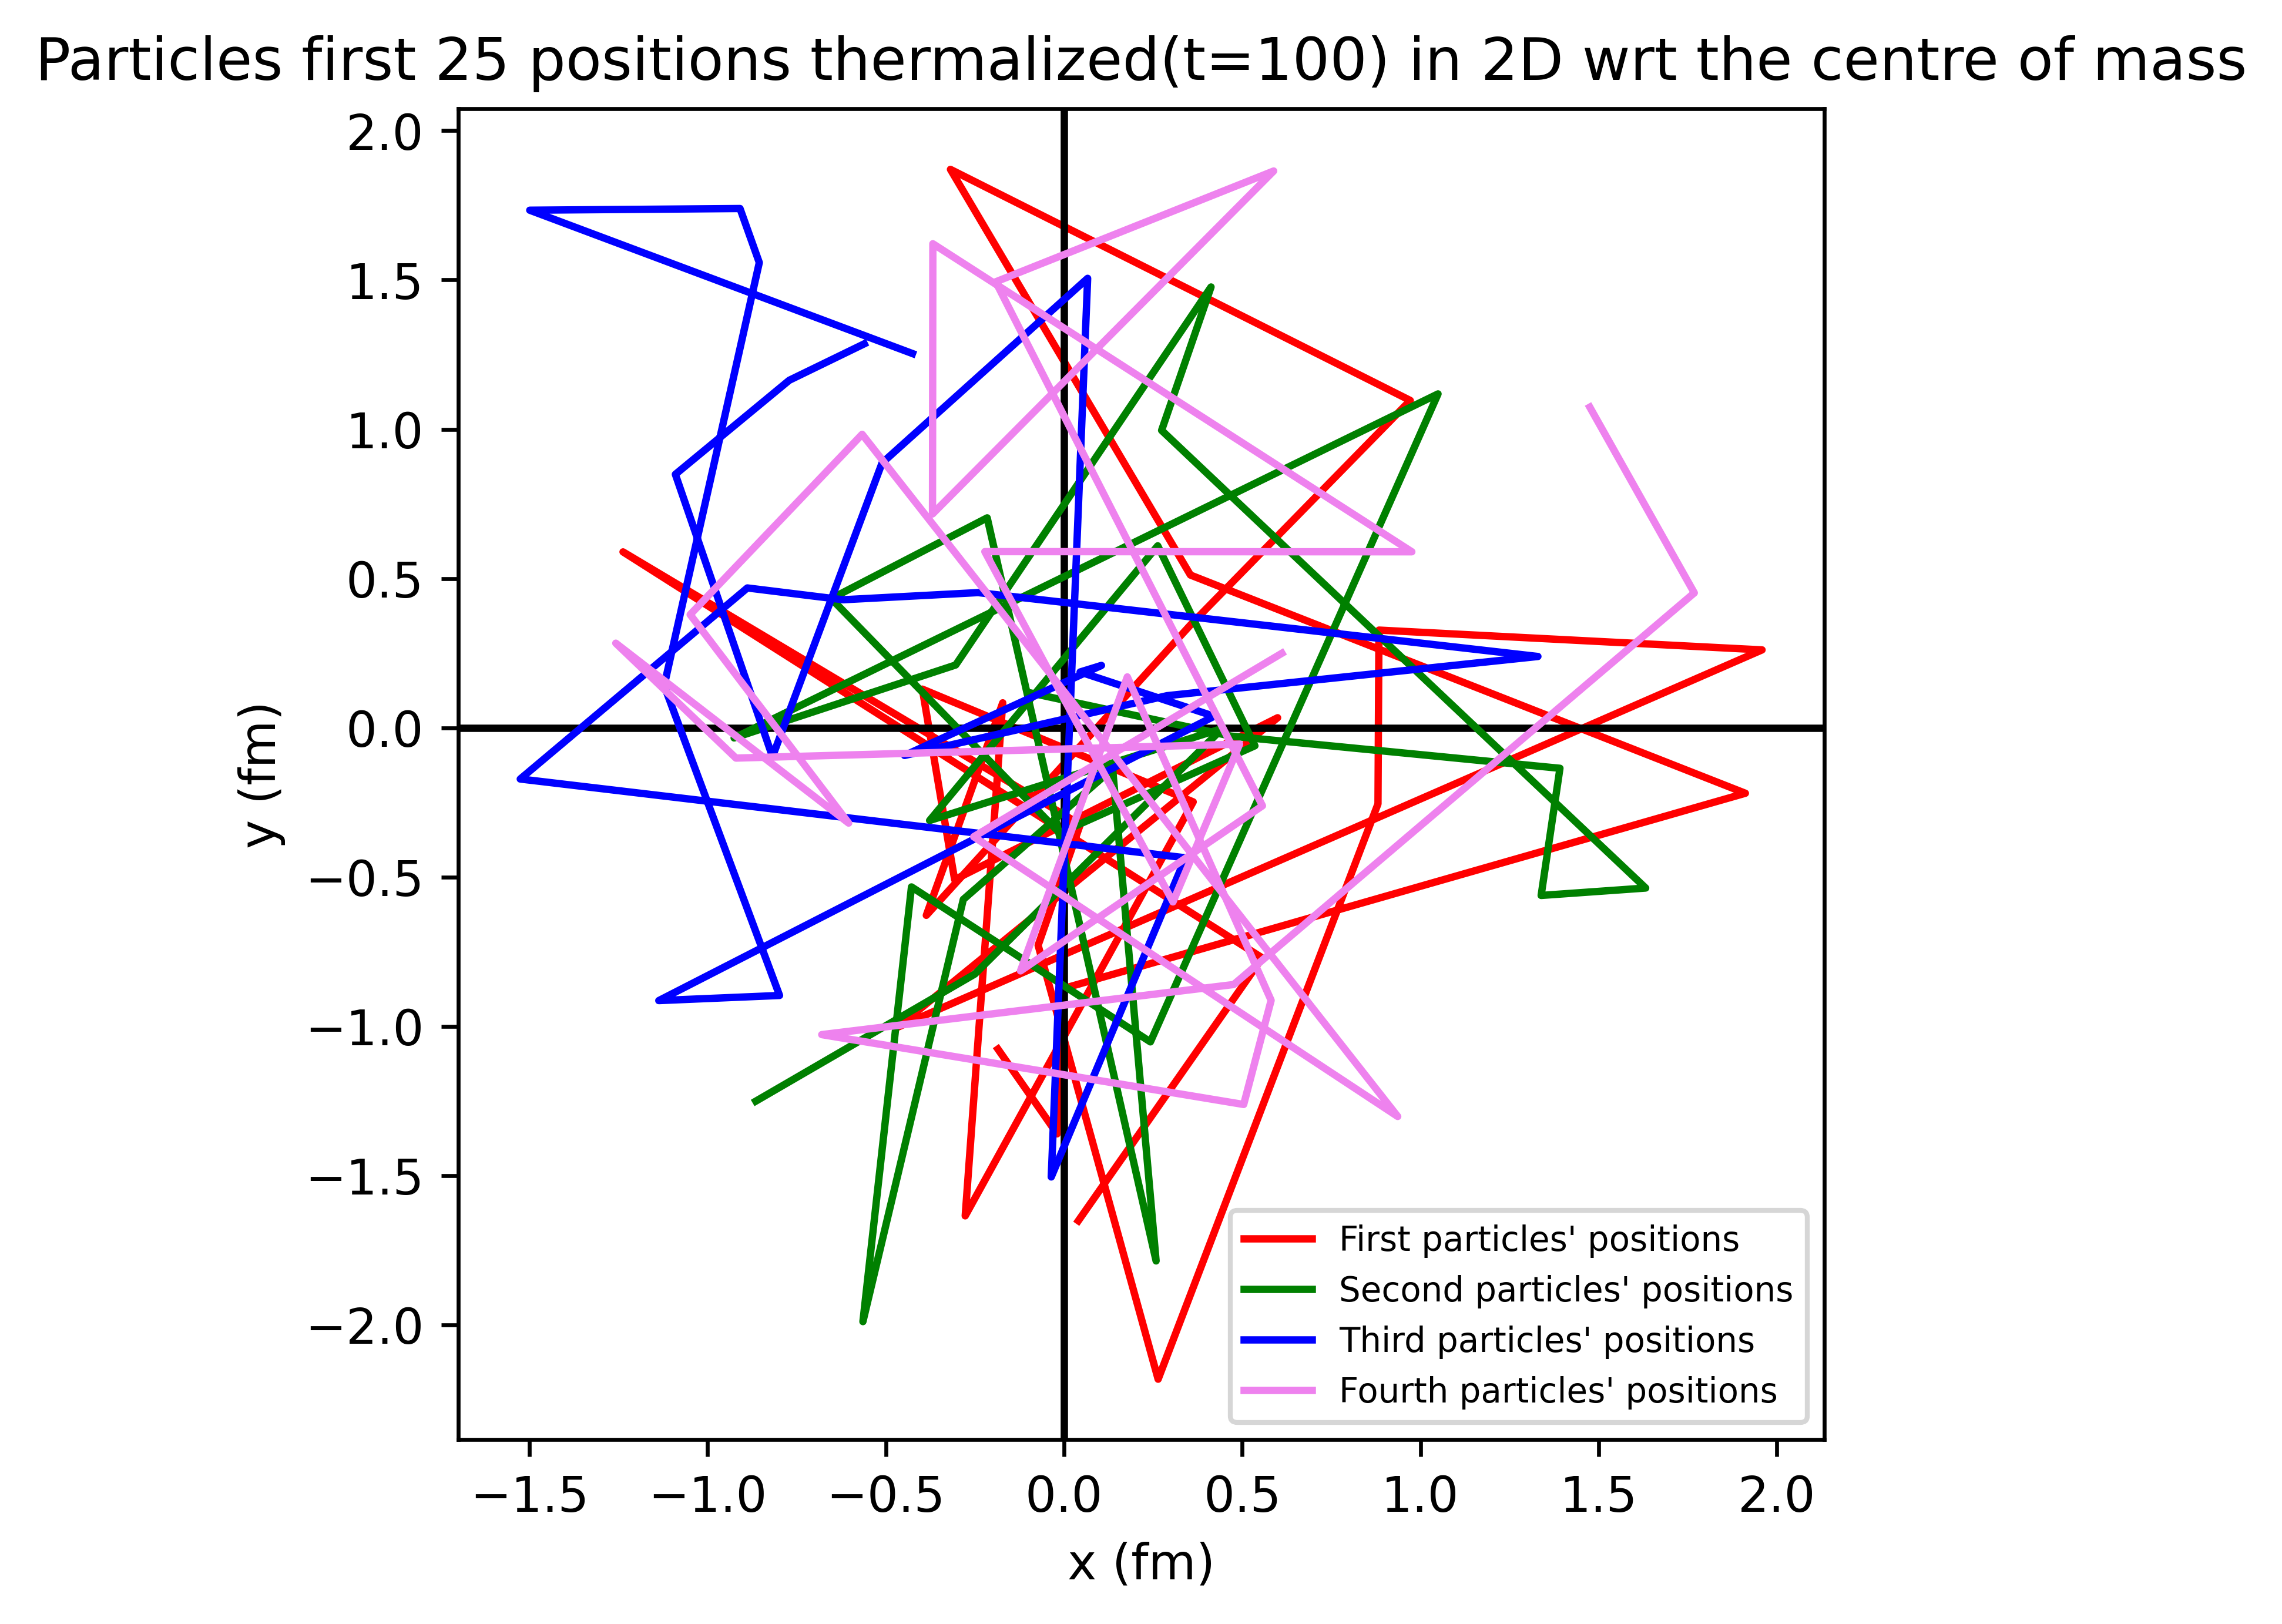

In [36]:
#-----Done by nico

fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
ax.plot(list_X_cm_T[0:25], list_Y_cm_T[0:25], color = "red", label= "First particles' positions")
ax.axvline(x=0,color='black')
ax.axhline(y=0, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
ax.plot(list_X_cm_T_2[0:25], list_Y_cm_T_2[0:25], c="green", label = "Second particles' positions")
ax.plot(list_X_cm_T_3[0:25], list_Y_cm_T_3[0:25], c="blue", label = "Third particles' positions")
ax.plot(list_X_cm_T_4[0:25], list_Y_cm_T_4[0:25], c="violet", label = "Fourth particles' positions")
ax.set_title("Particles first 25 positions thermalized(t=100) in 2D wrt the centre of mass")
ax.legend(fontsize = 'x-small')
plt.show()

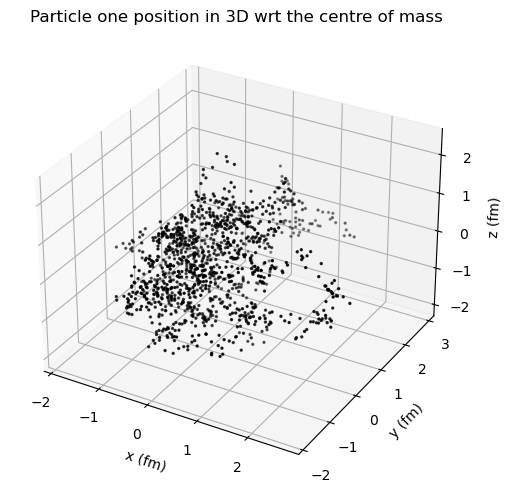

In [37]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(list_X_cm, list_Y_cm, list_Z_cm, s=2 , c="black")  #ALso with s=6 is not bad
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
ax.set_zlabel('z (fm)')
plt.title("Particle one position in 3D wrt the centre of mass")
plt.show()

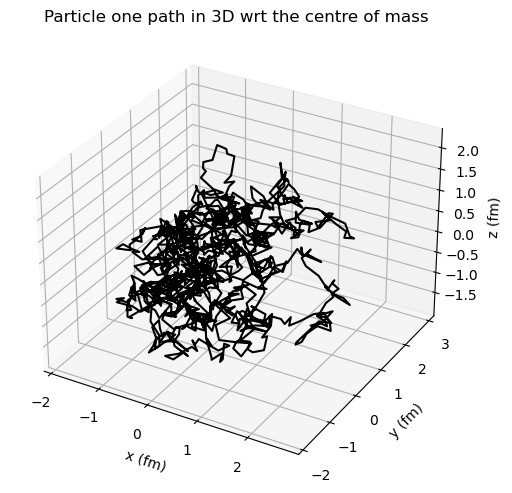

In [38]:
#Done by nico

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.plot(list_X_cm, list_Y_cm, list_Z_cm , c="black")
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
ax.set_zlabel('z (fm)')
plt.title("Particle one path in 3D wrt the centre of mass")
plt.show()

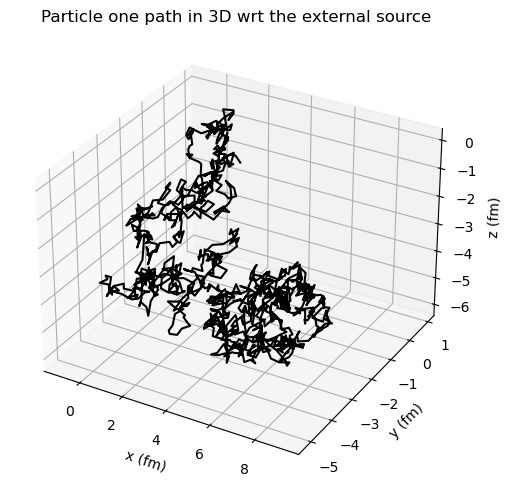

In [39]:
#Done by nico

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.plot(list_X, list_Y, list_Z , c="black")
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
ax.set_zlabel('z (fm)')
plt.title("Particle one path in 3D wrt the external source")
plt.show()

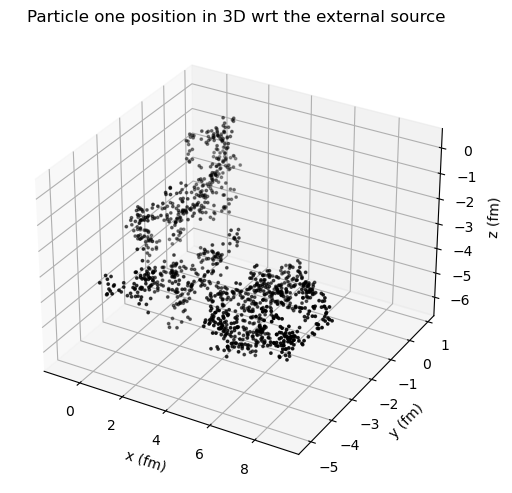

In [40]:
#Done by nico

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(list_X, list_Y, list_Z , s=3, c="black")
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
ax.set_zlabel('z (fm)')
plt.title("Particle one position in 3D wrt the external source")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(336.9714285714286, 0.5, '')

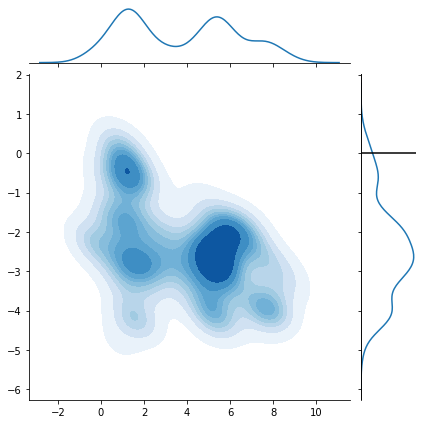

In [41]:
#Done by nico
sb.jointplot(list_X, list_Y, kind='kde',shade=True, cmap='Blues')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')

plt.xlabel("")
plt.ylabel("")
#maybe is to cancel!

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

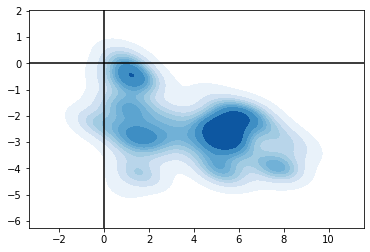

In [42]:
#Done by nico
sb.kdeplot(list_X, list_Y, shade=True, cmap="Blues")
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')

plt.xlabel("")
plt.ylabel("")


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

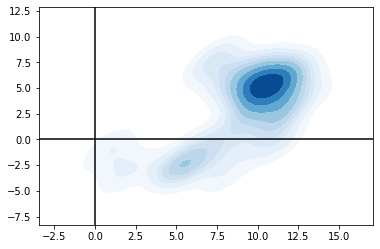

In [43]:
#----Done by nico


sb.kdeplot(list_X_t, list_Y_t, shade=True, cmap="Blues")
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')

plt.xlabel("")
plt.ylabel("")



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

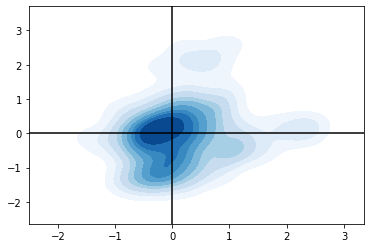

In [44]:
#Done by nico
sb.kdeplot(list_X_cm, list_Y_cm, shade=True, cmap="Blues")
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')

plt.xlabel("")
plt.ylabel("")



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

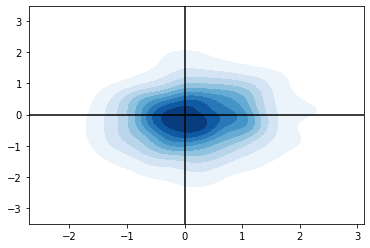

In [45]:
#Done by nico
sb.kdeplot(list_X_cm_t, list_Y_cm_t, shade=True, cmap="Blues")
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')

plt.xlabel("")
plt.ylabel("")



In [46]:
#-----Done by nico
#From theese two last plot the one of X_cm and X_cm_t we can appreciate the better 
#centered trend of the thermalized metropolis hasting model.

In [35]:
#Per avere una buona stima di p(x) è necessario generare sequenze abbastanza lunghe. 
#La scelta del parametro delta può essere cruciale, se è troppo grande solo una piccola
#parte dei valori di prova proposti verrà accettato. Se invece è troppo piccolo la catena 
#si muoverà molto lentamente e i valori risulteranno estremamente autocorrelati.

#Di conseguenza, essendo delta dipendente dalla forma e dalla scala di p(x) deve essere di
#volta in volta calibrato correttamente; per la sua stima si può procedere per 
#approssimazione successiva in modo che, fissato un delta, il numero di valori accettati 
#sia un terzo del totale. Anche la scelta del valore iniziale è molto importante, 
#in genere conviene partire da valori di x tali che p(x) assuma valori massimi in modo da 
#avere una buona statistica nelle zone più probabili.

In [ ]:
#Affinché l'algoritmo perda memoria del dato iniziale e converga verso la distribuzione 
#che si vuole campionare, è necessario eseguire un numero iniziale di iterazioni: 
#tale numero si definisce tempo di termalizzazione. Similmente, nel calcolo degli errori
#è necessario considerare un tempo di correlazione, che consideri l'autocorrelazione 
#tra due campionamenti successivi.

In [ ]:
#In questo capitolo studieremo un algoritmo, noto come algoritmo di Metropo- lis,
#per la ricerca dei punti di minimo assoluto di una funzione
#utilizzando la modellizzazione fornita dalla teoria sulle catene di Markov. 
#Tale algoritmo `e particolarmente efficace quando N `e molto grande, quindi,
#l’algoritmo banale consistente nel calcolo e confronto dei valori assunti 
#dalla funzione V `e troppo costoso in termini di tempo.

In [36]:
#CONCLUSION
#1. T=100 is too much, you loose the significativity of the process.